## Лабораторная работа №3 «Цифровой спектральный анализ детерминированных сигналов»
Данная лабораторная работа посвящена основам цифрового спектрального анализа. Ей
предшествует лабораторная работа №2 ДВПФ и ДПФ и лабораторная работа №1 дискретизация
аналоговых сигналов. Работа нацелена на изучение эффектов, возникающих при спектральном
анализе.
Под детерминированностью сигнала в данном случае подразумевается то, что спектральный
анализ производится для конкретной реализации, которая полностью определена.

In [162]:
from math import copysign
from math import ceil
import numpy as np 
import scipy as scp
import matplotlib.pyplot as plt
from matplotlib import gridspec

## Модуль 1. ДПФ и спектральный анализ

## Задание на моделирование

### Задача 1.1. Частотная ось ДПФ

Считайте отсчеты дискретного сигналаx[k], содержащегося в аудиофайле Вашего варианта.
1) Выберите y[k] — часть информативной области сигнала x[k]
длиной $2^{14}$ отсчетов. Если в файле меньше $2^{14}$ отсчетов, дополните ее нулями до этого числа отчетов справа.
2) Постройте с помощью алгоритма БПФ один период ДВПФ сигнала y[k]. Укажите расстояние между точками по оси частот. Ось частот приведите в Гц. Определите по графику частоты основных гармонических компонент.
3) Выведите график сигнала y[k] в области, где наблюдается колебание. По графику оцените период этого колебания $T_{0}$. Сравните частоту $f_{0}=\frac{1}{T_{0}}$ с частотами основных гармоник из п.2

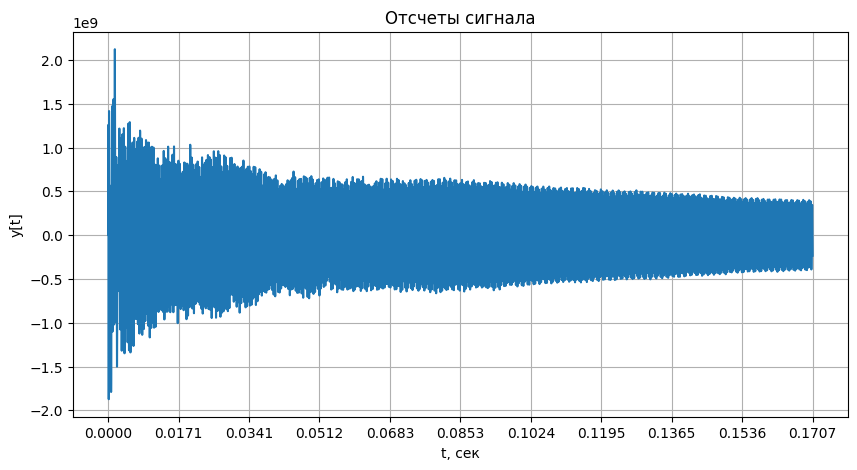

In [2]:
# 1

samplerate, wav_data = scp.io.wavfile.read("data/glockenspiel.wav")

n = 2**14
y_k = np.array(wav_data[:2**14])

duration = n / samplerate
t_k = np.linspace(0, duration, n)

plt.figure(figsize=[10,5])
plt.xticks(np.arange(0, duration + 1/samplerate, duration/10))

plt.grid()
plt.title('Отсчеты сигнала')
plt.xlabel('t, сек')
plt.ylabel('y[t]')

plt.plot(t_k, y_k)

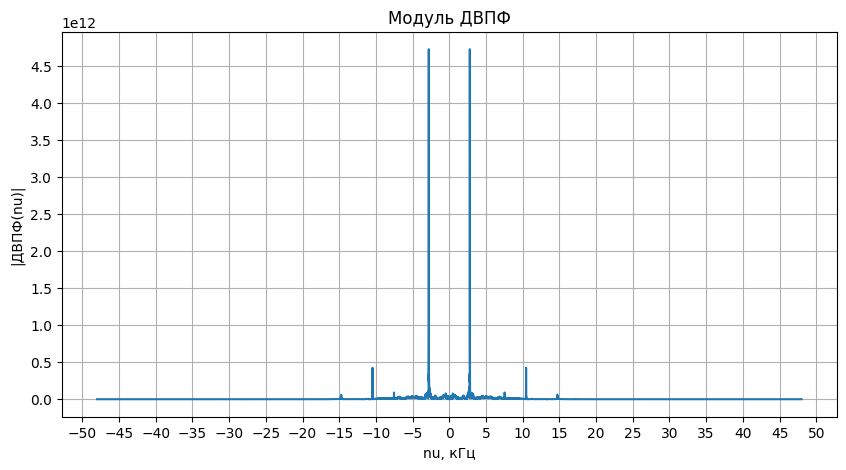

In [3]:
# 2

# ДВПФ
dtft_y_k = np.fft.fftshift(np.fft.fft(y_k, n))
nu = (np.arange(n) / (n) - 0.5) * samplerate / 1000

plt.figure(figsize=[10,5])
plt.xticks(np.arange(-50, +55, 5))
plt.yticks(np.arange(0, 5 * 1e12, 0.5 * 1e12))

plt.grid()
plt.title('Модуль ДВПФ')
plt.xlabel('nu, кГц')
plt.ylabel('|ДВПФ(nu)|')

plt.plot(nu, np.abs(dtft_y_k))

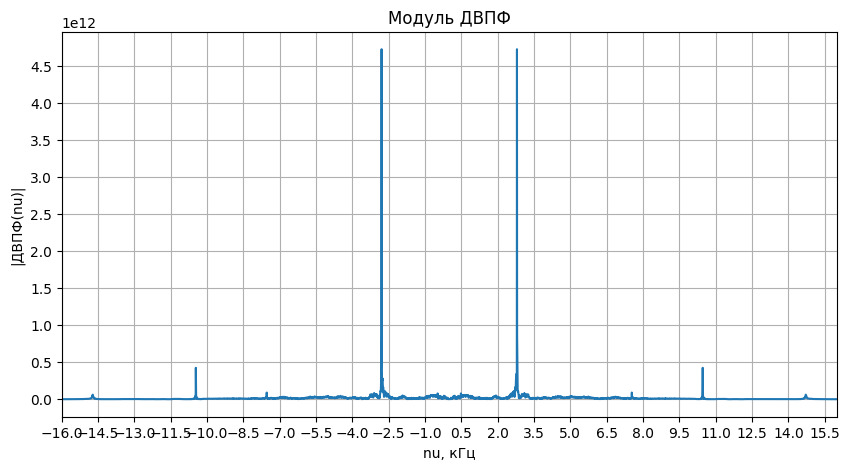

In [4]:
# Более читабельный график

plt.figure(figsize=[10,5])
plt.xlim(-16, 16)
plt.xticks(np.arange(-16, +16, 1.5))
plt.yticks(np.arange(0, 5 * 1e12, 0.5 * 1e12))

plt.grid()
plt.title('Модуль ДВПФ')
plt.xlabel('nu, кГц')
plt.ylabel('|ДВПФ(nu)|')

plt.plot(nu, np.abs(dtft_y_k))

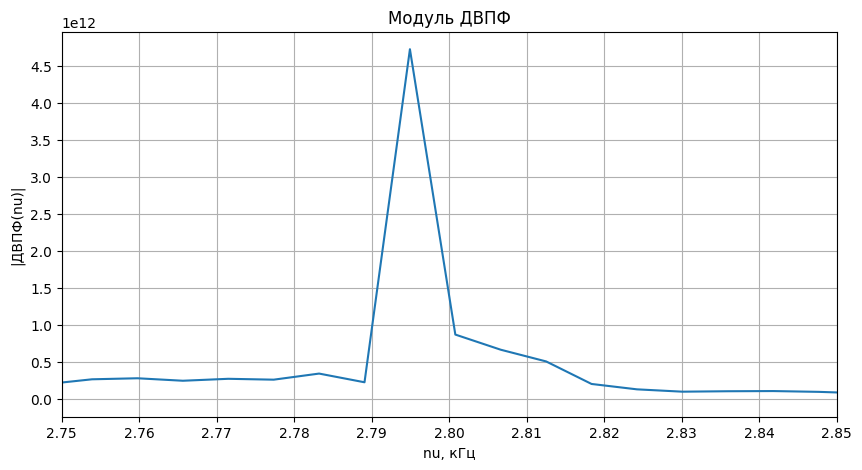

In [5]:
# Области ДФПВ вблизи основных гармоник

# f1 = 2.795 kHz

plt.figure(figsize=[10,5])
plt.xlim(+2.75, +2.85)
plt.xticks(np.arange(+2.75, +2.85, 0.01))
plt.yticks(np.arange(0, 5 * 1e12, 0.5 * 1e12))

plt.grid()
plt.title('Модуль ДВПФ')
plt.xlabel('nu, кГц')
plt.ylabel('|ДВПФ(nu)|')

plt.plot(nu, np.abs(dtft_y_k))

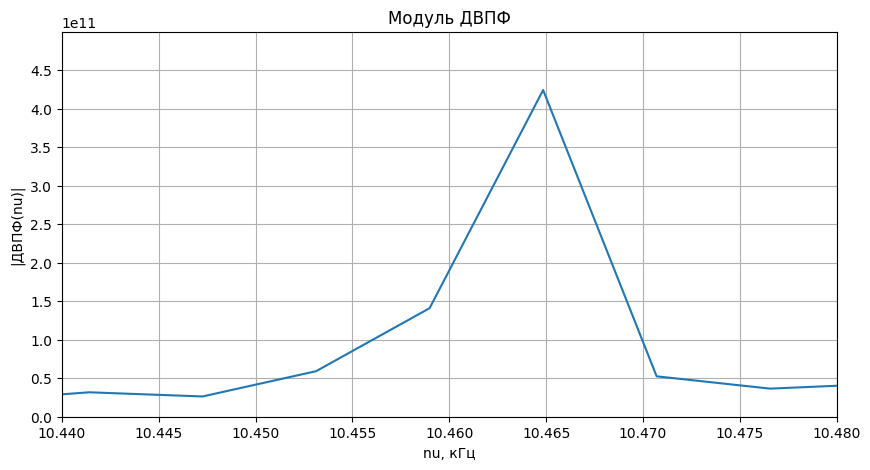

In [6]:
# f2 = 10.465 kHz

plt.figure(figsize=[10,5])
plt.xlim(+10.44, +10.48)
plt.xticks(np.arange(+10.44, +10.48, 0.005))
plt.ylim(0, 0.5 * 1e12)
plt.yticks(np.arange(0, 0.5 * 1e12, 0.05 * 1e12))

plt.grid()
plt.title('Модуль ДВПФ')
plt.xlabel('nu, кГц')
plt.ylabel('|ДВПФ(nu)|')

plt.plot(nu, np.abs(dtft_y_k))

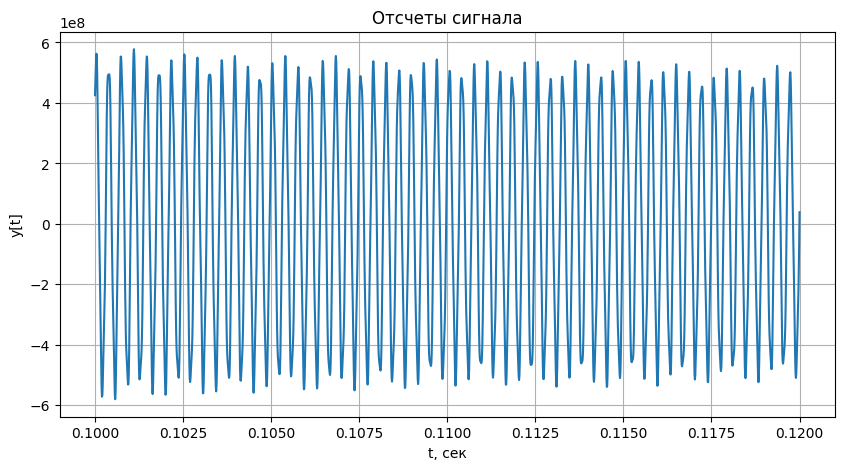

In [7]:
# 3 

t1 = 0.10
t2 = 0.12

k1 = int(t1 * samplerate)
k2 = int(t2 * samplerate)

sub_duration = (k2-k1) / samplerate
sub_y_k = y_k[k1:k2]
sub_t_k = np.linspace(t1, t2, k2-k1)

plt.figure(figsize=[10,5])
# plt.xticks(np.arange(0, sub_duration + 1/samplerate, sub_duration/10))

plt.grid()
plt.title('Отсчеты сигнала')
plt.xlabel('t, сек')
plt.ylabel('y[t]')

plt.plot(sub_t_k, sub_y_k)

In [8]:
zeros_ct = 0.;
for idx in range(len(sub_y_k) - 1):
    if copysign(1, sub_y_k[idx]) * copysign(1, sub_y_k[idx+1]) < 0: 
        zeros_ct += 1

periods_num = zeros_ct / 2
freq = periods_num / sub_duration
print(freq)

2800.0


### Задача 1.2. Задача распознавания спектральных компонент 
Считайте последовательность $x[k]$ из файла Вашего варианта. Известно, что ее аналитическая запись  имеет вид

$$x[k]=\sum \limits_{m=1}^{M}{{{A}_{m}}}\sin (2\pi \frac{m}{N}k+{{\varphi }_{m}}),\quad k=0,\ 1,\ 2,\ \ldots , \ N-1,$$

где $N$ — длина последовательности, $M<(N-1)/2$, относительные частоты гармонических компонент совпадают с бинами ДПФ. Определите число компонент,  их амплитуды ${{A}_{m}}$ и фазы ${{\varphi }_{m}}$, $m=1,\dots, M$.

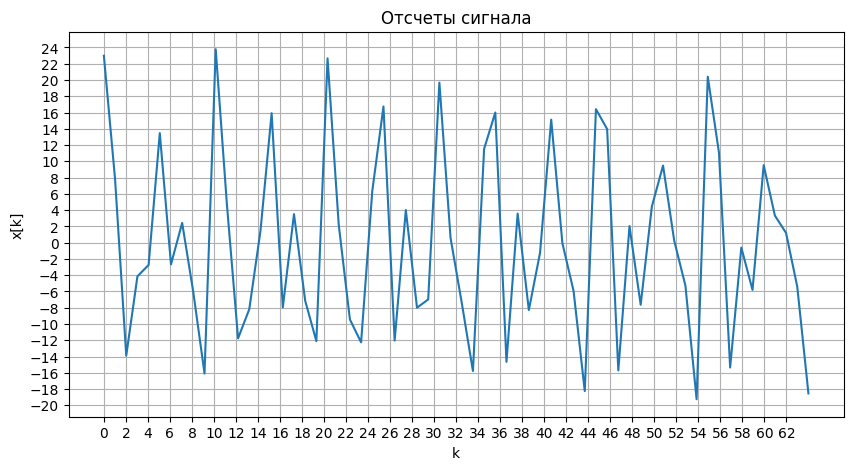

In [9]:
npy_data = np.load('data/1_2.npy')

n = len(npy_data)
x_k = np.array(npy_data)
k = np.linspace(0, n, n)

plt.figure(figsize=[10,5])
plt.xticks(np.arange(0, n, 2))
plt.yticks(np.arange(-20, +26, 2))

plt.grid()
plt.title('Отсчеты сигнала')
plt.xlabel('k')
plt.ylabel('x[k]')

plt.plot(k, x_k)

$A_{m}=2|\tilde{X}[m]|$, $\phi_{m}=arg(\tilde{X}[m])+\frac{\pi}{2}$, $m \in [0,\frac{N}{2}-1]$

In [10]:
M     = int(n/2 - 1)
A_m   = np.zeros(M) 
phi_m = np.zeros(M)

dft_x_k = np.fft.fft(x_k)

for idx in range(0,M):
    A_m[idx]   = 2 * np.abs(dft_x_k[idx])
    phi_m[idx] = np.angle(dft_x_k[idx]) + np.pi / 2

A_m = [A_m[idx] for idx in range(len(A_m)) if np.abs(A_m[idx]) > 1e-6]
phi_m = [phi_m[idx] for idx in range(len(A_m)) if np.abs(A_m[idx]) > 1e-6]

print(A_m)
print(phi_m)

[703.9999999999997, 511.99999999999966, 576.0]
[4.71238898038469, -1.1085132836971878, -0.9750117791718376]


## Модуль 2. Окна в спектральном анализе

## Задание на моделирование

### Задача 2.1. Исследование характеристик различных окон.

In [11]:
N = 20 + 2 * 3

# 1) прямоугольное (`boxcar`)
# 2) Бартлетта (`bartlett`)
# 3) Ханна (`hann`)
# 4) Хэмминга (`hamming`)
# 5) Блэкмана (`blackman`)
# 6) окно с плоской вершиной (`flattop`)

windows = [
    "Boxcar",
    "Bartlett", 
    "Hann",  
    "Hamming", 
    "Blackman", 
    "Flattop"
]

window_funcs = {
    "Boxcar":   scp.signal.windows.boxcar, 
    "Bartlett": scp.signal.windows.bartlett,
    "Hann":     scp.signal.windows.hann,
    "Hamming":  scp.signal.windows.hamming,
    "Blackman": scp.signal.windows.blackman,
    "Flattop":  scp.signal.windows.flattop,
}

def window_plots(window: str, N: int):
    
    x_k = window_funcs[window](N)
    k = np.linspace(0, N, N)

    fig, (ax1, ax2, ax3) = plt.subplots(3, constrained_layout=True)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.suptitle(window)
    
    ax1.set_xlim(-N/2, +3*N/2)
    ax1.set_xticks(np.arange(-N/2, +3*N/2, 4))
    ax1.set_ylim(0, 1.2)
    ax1.set_yticks(np.arange(0, 1.3, 0.2))
    
    ax1.grid()
    ax1.set_title(f"Окно во временной области")
    ax1.set_xlabel('k')
    ax1.set_ylabel('x[k]')
    
    ax1.stem(k, x_k)

    #-----
    
    n = 4096
    dft_x_k = np.fft.fftshift(np.fft.fft(x_k, n))
    nu = np.arange(n) / (n) - 0.5

    ax2.set_xlim(-0.6, +0.6)
    ax2.set_xticks(np.arange(-0.6, +0.6, 0.1))
    
    ax2.grid()
    ax2.set_title(f"AЧХ")
    ax2.set_xlabel('nu')
    ax2.set_ylabel('|W(nu)|')

    ax2.plot(nu, np.abs(dft_x_k))

    #-----

    max = np.max(np.abs(np.fft.fft(x_k, n)))
    db = 20 * np.log10(np.abs(dft_x_k) / max)
    
    ax3.set_xlim(-0.6, +0.6)
    ax3.set_xticks(np.arange(-0.6, +0.6, 0.1))
    
    ax3.grid()
    ax3.set_title(f"AЧХ, дБ")
    ax3.set_xlabel('nu')
    ax3.set_ylabel('20log(|W(nu)/W(0))|')

    ax3.plot(nu, db)


{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

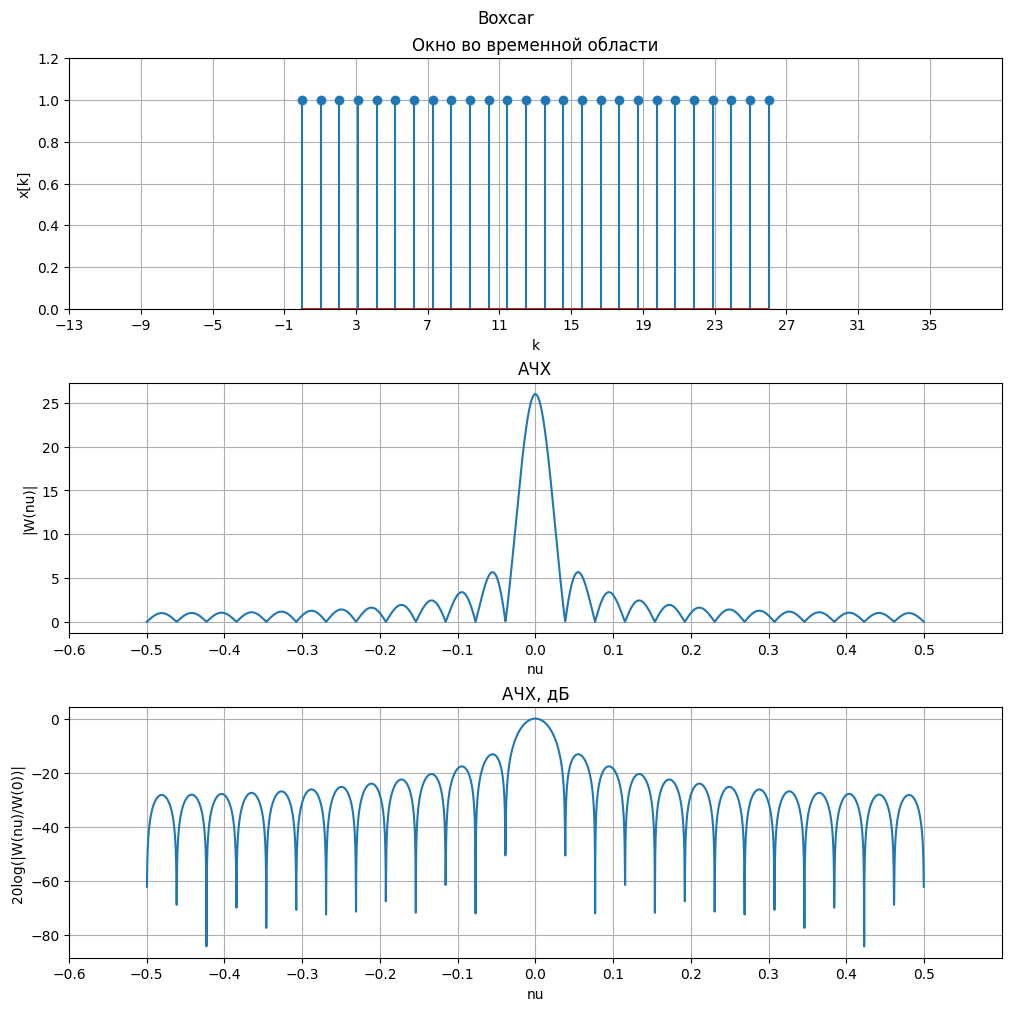

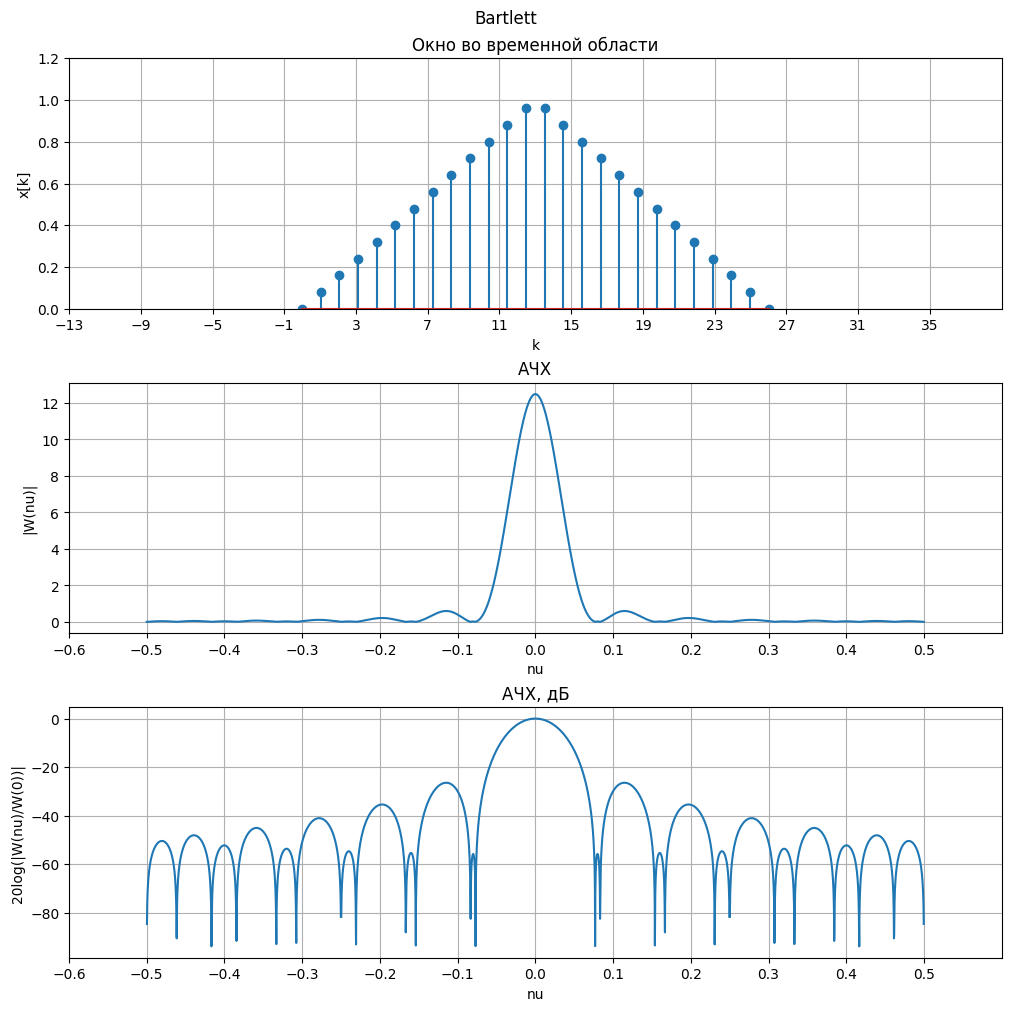

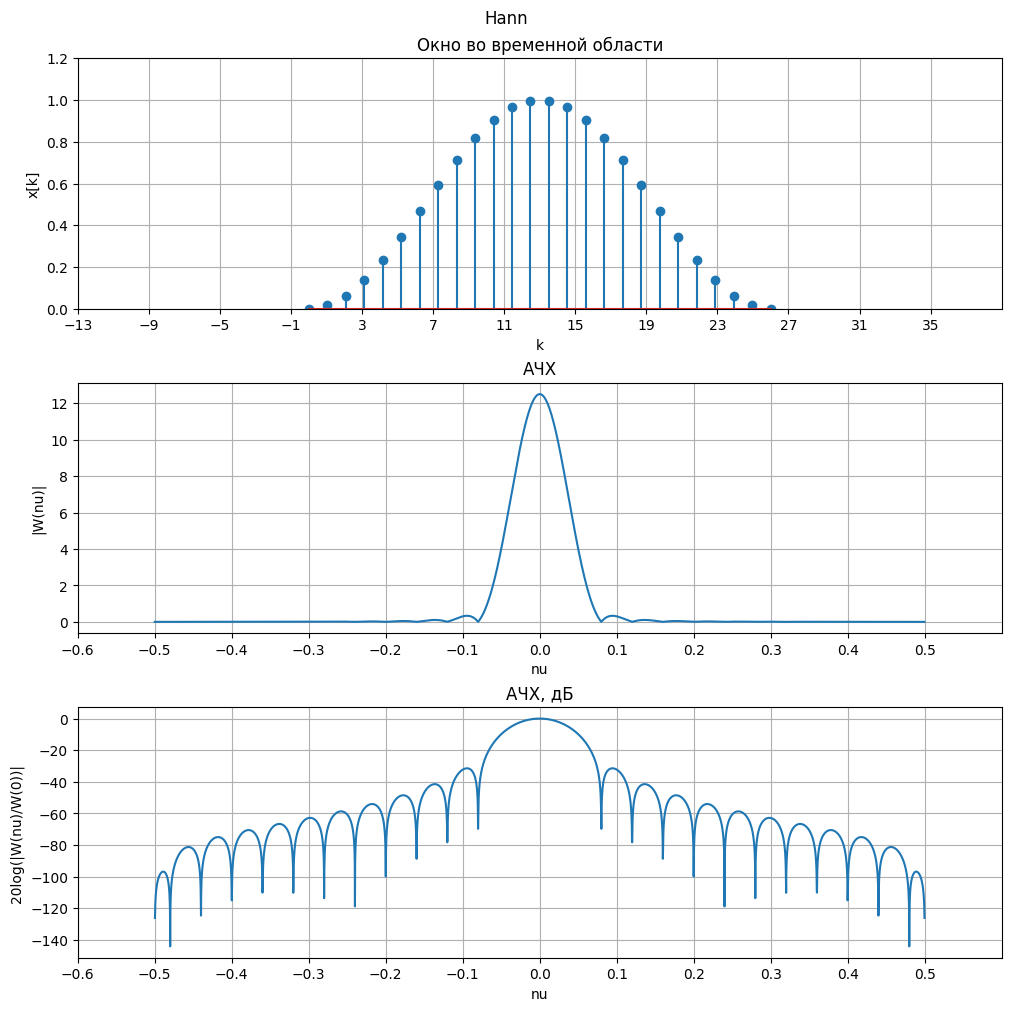

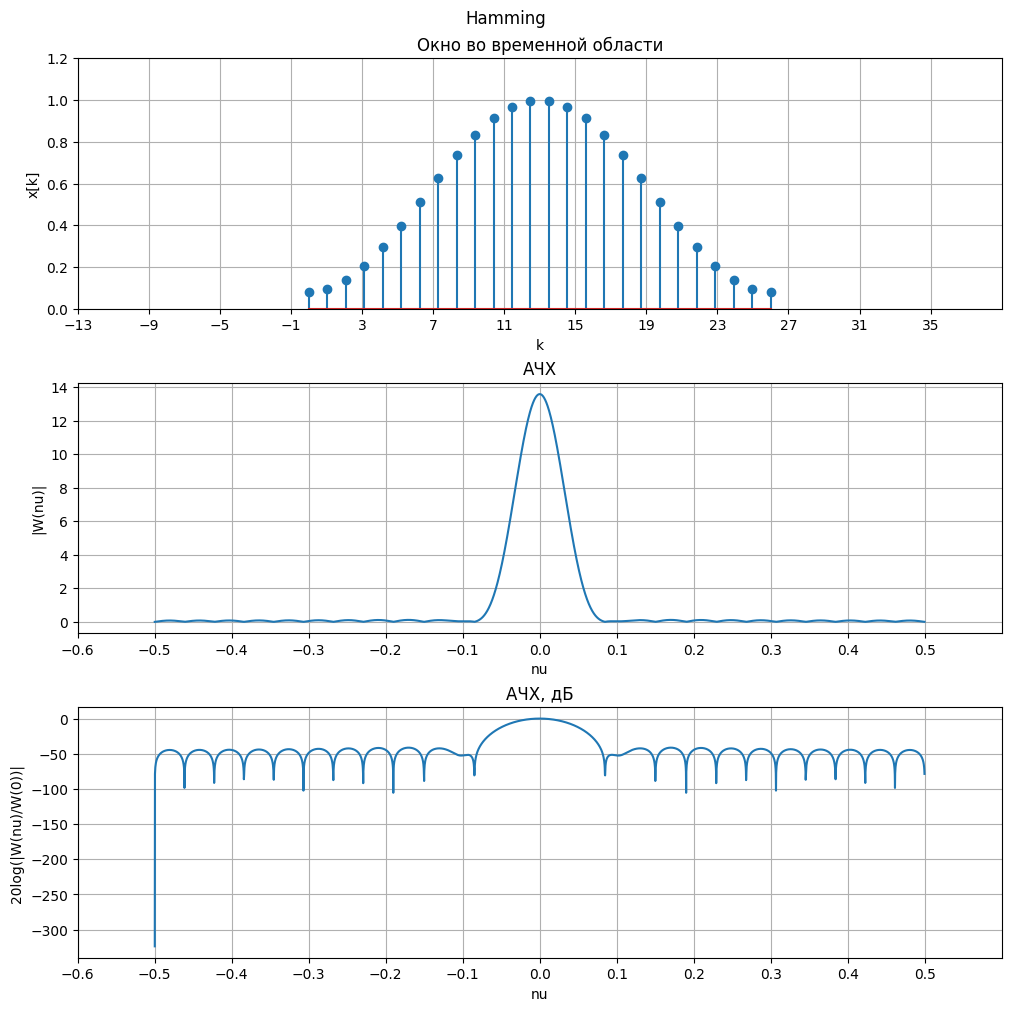

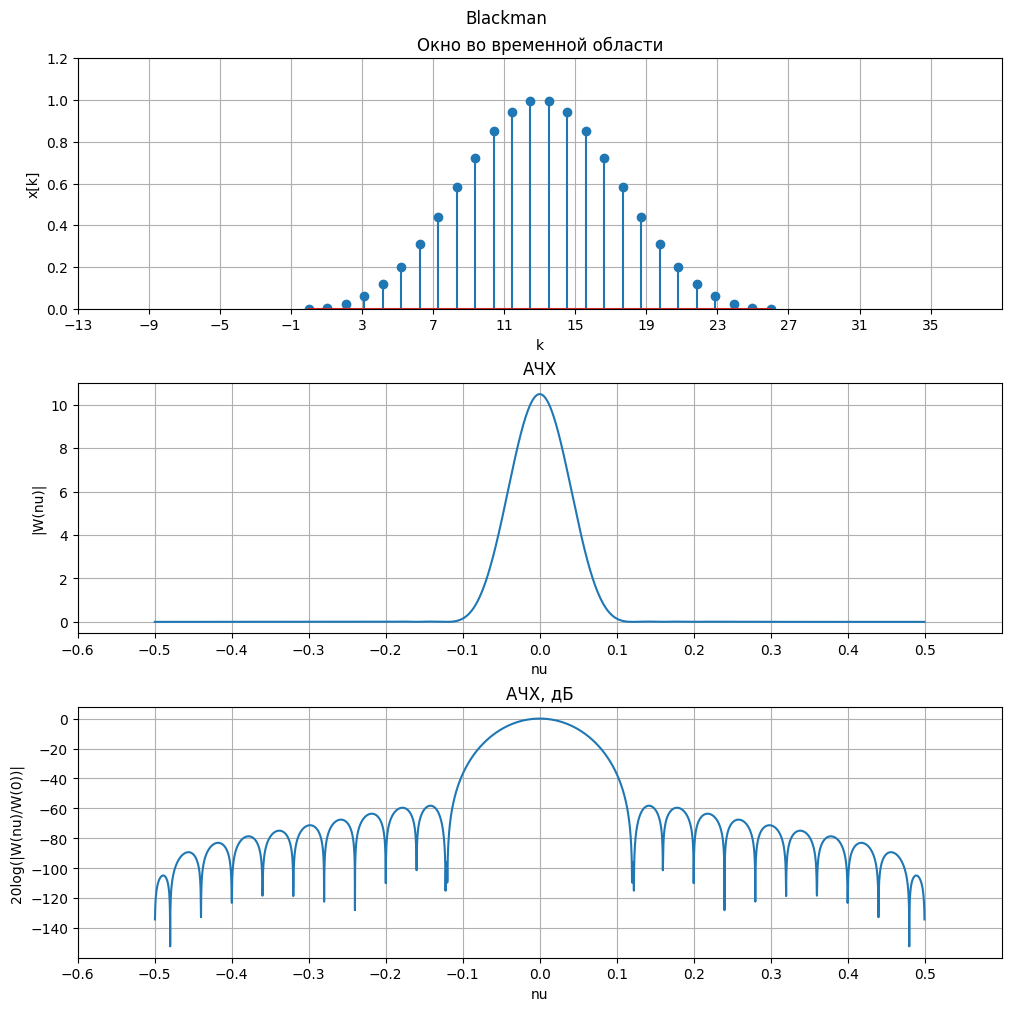

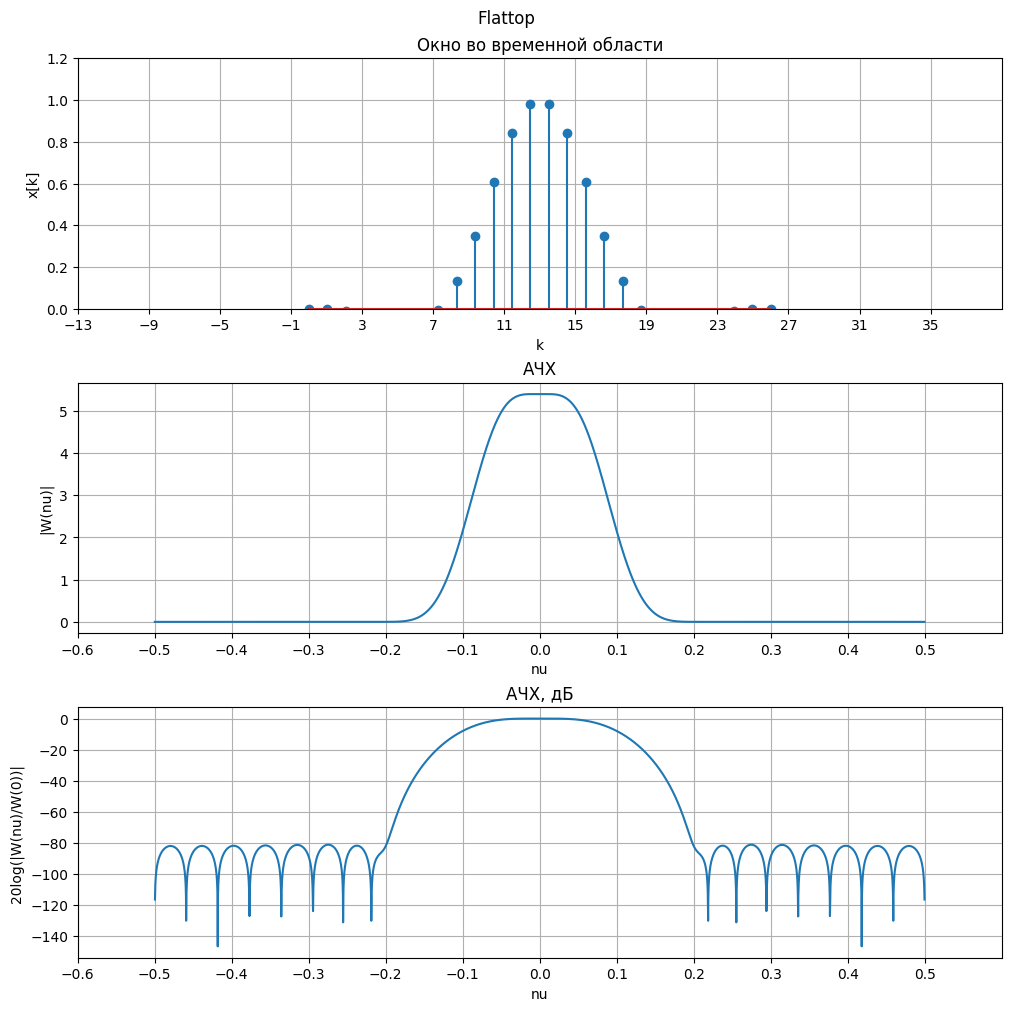

In [12]:
np.seterr(all="ignore")
for window in windows:
    window_plots(window, N)
np.seterr(all="warn")

| окно          | ширина главного лепестка на нулевом уровне (в бинах ДПФ) | уровень максимального бокового лепестка относительно главного (дБ) | скорость спада боковых лепестков дБ/октава |
|---------------|----------------------------------------------------------|--------------------------------------------------------------------|--------------------------------------------|
| Прямоугольное | 2                                                        | -13.3                                                              | 6                                          |
| Барлетта      | 4                                                        | -26.5                                                              | 12                                         |
| Ханна         | 4                                                        | -32                                                                | 18                                         |
| Хэмминга      | 4                                                        | -42                                                                | 6                                          |
| Блэкмана      | 6                                                        | -58.1                                                              | 18                                         |


### Задача 2.2. Окно Кайзера.

In [13]:
windows = [
    "Kaiser beta=0",
    "Kaiser beta=5", 
    "Kaiser beta=6",  
    "Kaiser beta=8.6", 
]

def _bind(f, beta): return lambda N: f(N, beta)

window_funcs = {
    "Kaiser beta=0":   _bind(scp.signal.windows.kaiser, 0),
    "Kaiser beta=5":   _bind(scp.signal.windows.kaiser, 5),
    "Kaiser beta=6":   _bind(scp.signal.windows.kaiser, 6),
    "Kaiser beta=8.6": _bind(scp.signal.windows.kaiser, 8.6)
}

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

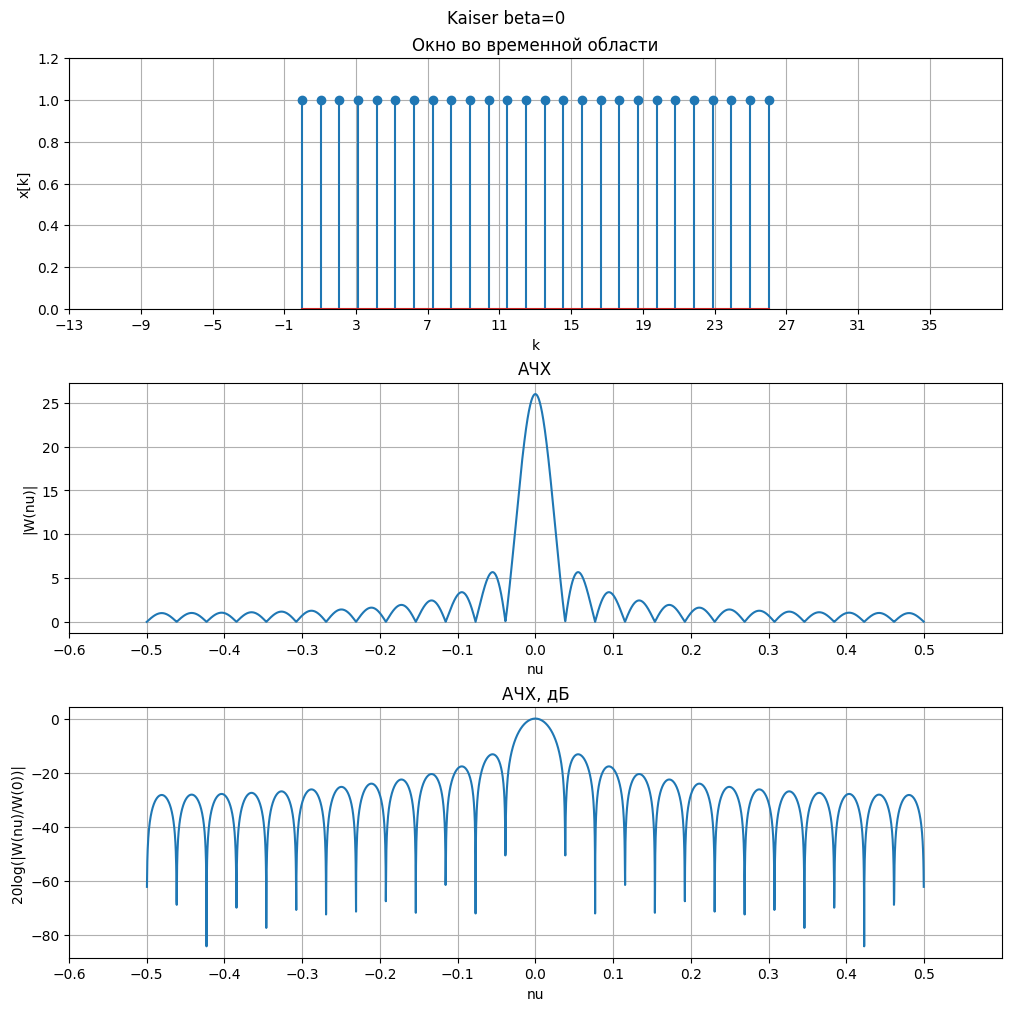

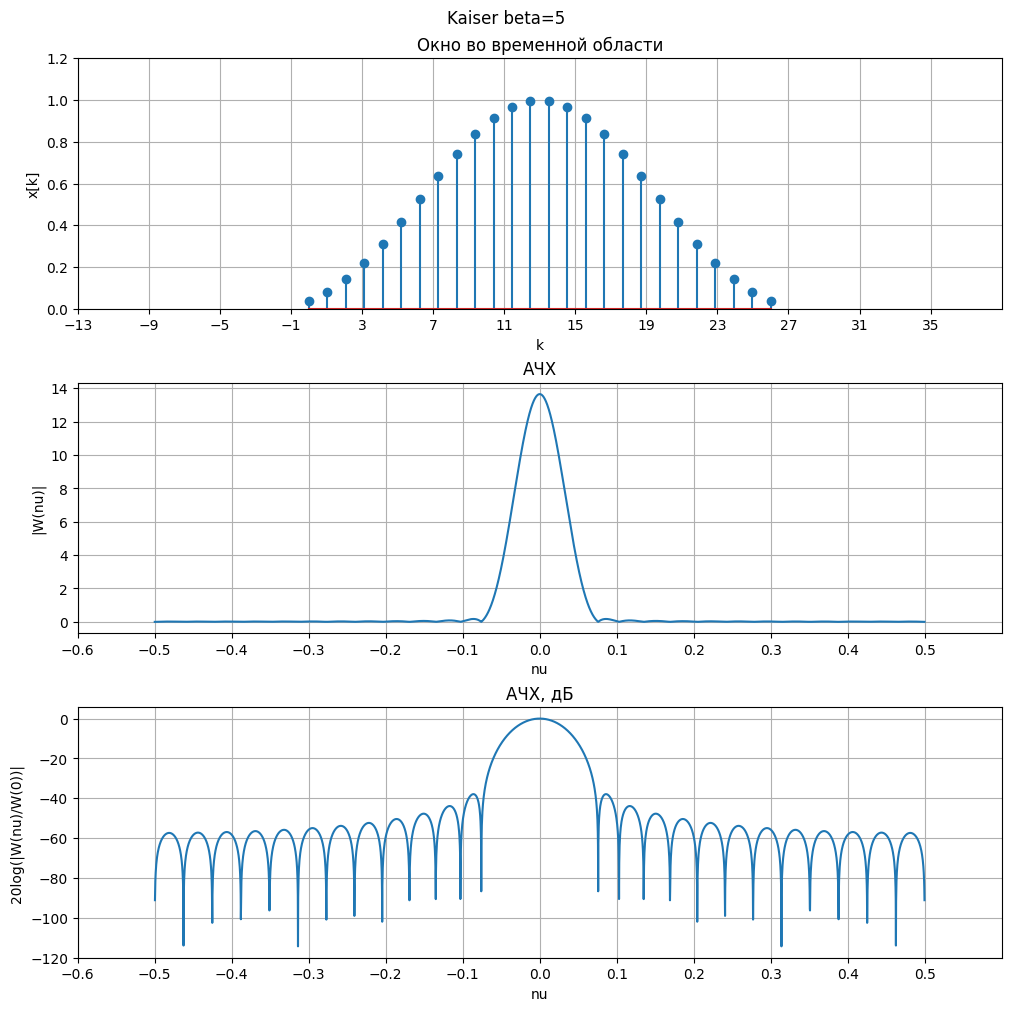

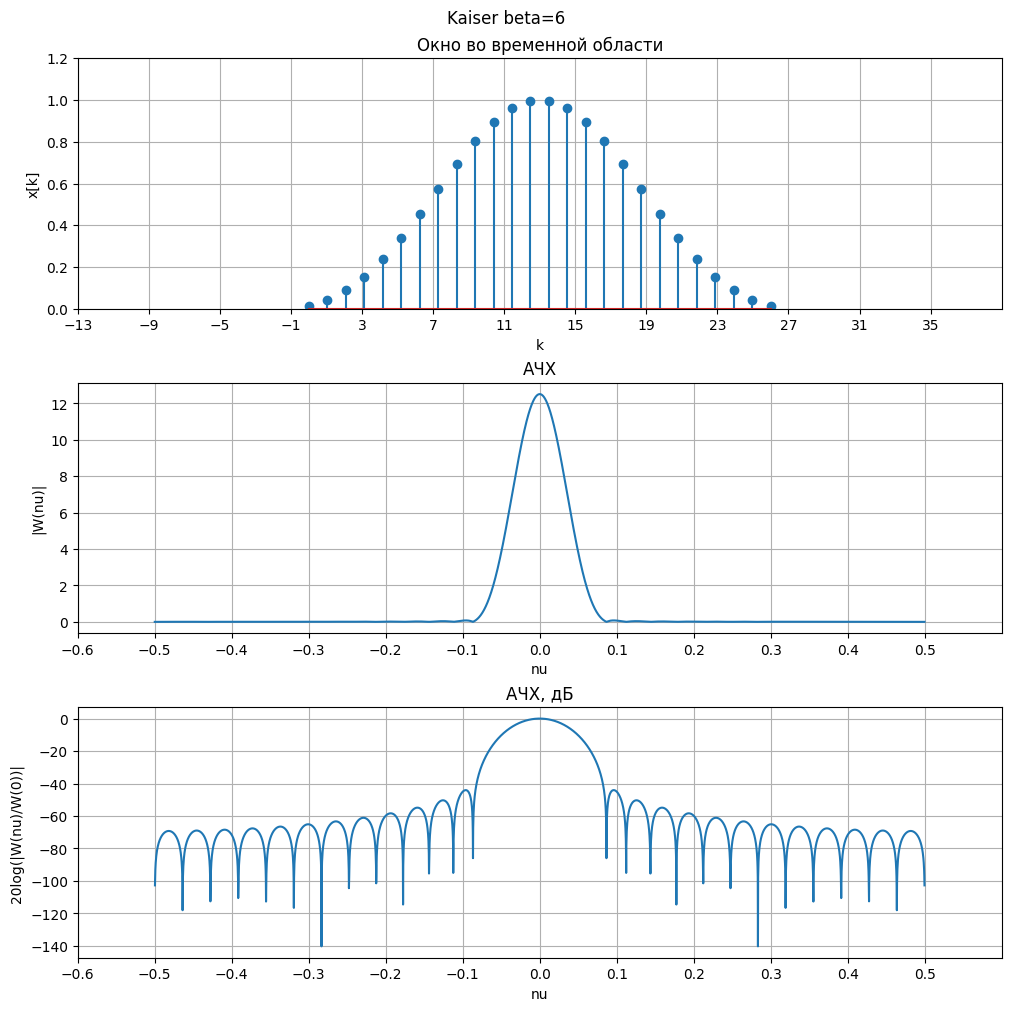

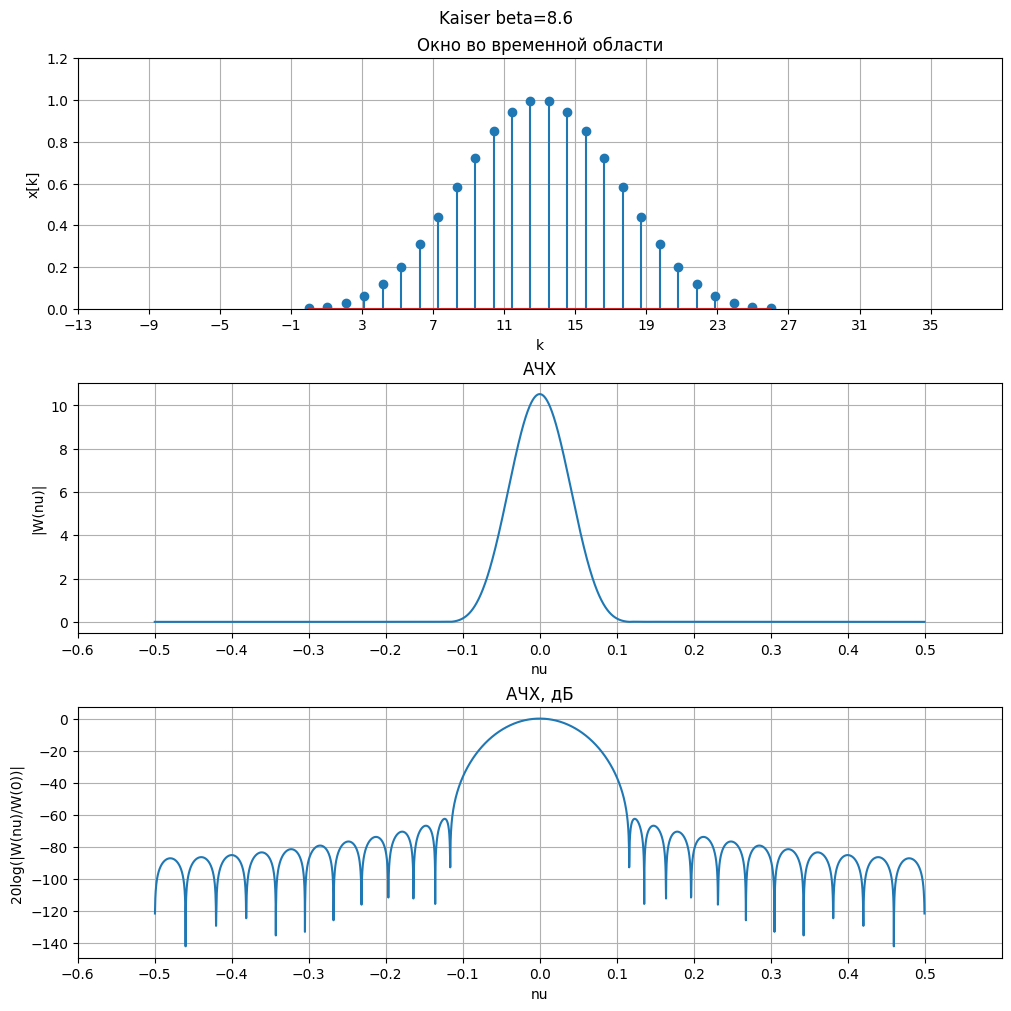

In [14]:
np.seterr(all="ignore")
for window in windows:
    window_plots(window, N)
np.seterr(all="warn")

### Задача 2.3. Окно Чебышева.

In [15]:
windows = [
    "Chevwin at=14",
    "Chevwin at=39", 
    "Chevwin at=44",  
    "Chevwin at=62", 
]

def _bind(f, at): return lambda N: f(N, at)

window_funcs = {
    "Chevwin at=14": _bind(scp.signal.windows.chebwin, 14),
    "Chevwin at=39": _bind(scp.signal.windows.chebwin, 39),
    "Chevwin at=44": _bind(scp.signal.windows.chebwin, 44),
    "Chevwin at=62": _bind(scp.signal.windows.chebwin, 62)
}

/Users/rustamsubkhankulov/Library/Python/3.9/lib/python/site-packages/scipy/signal/windows/_windows.py:1543: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

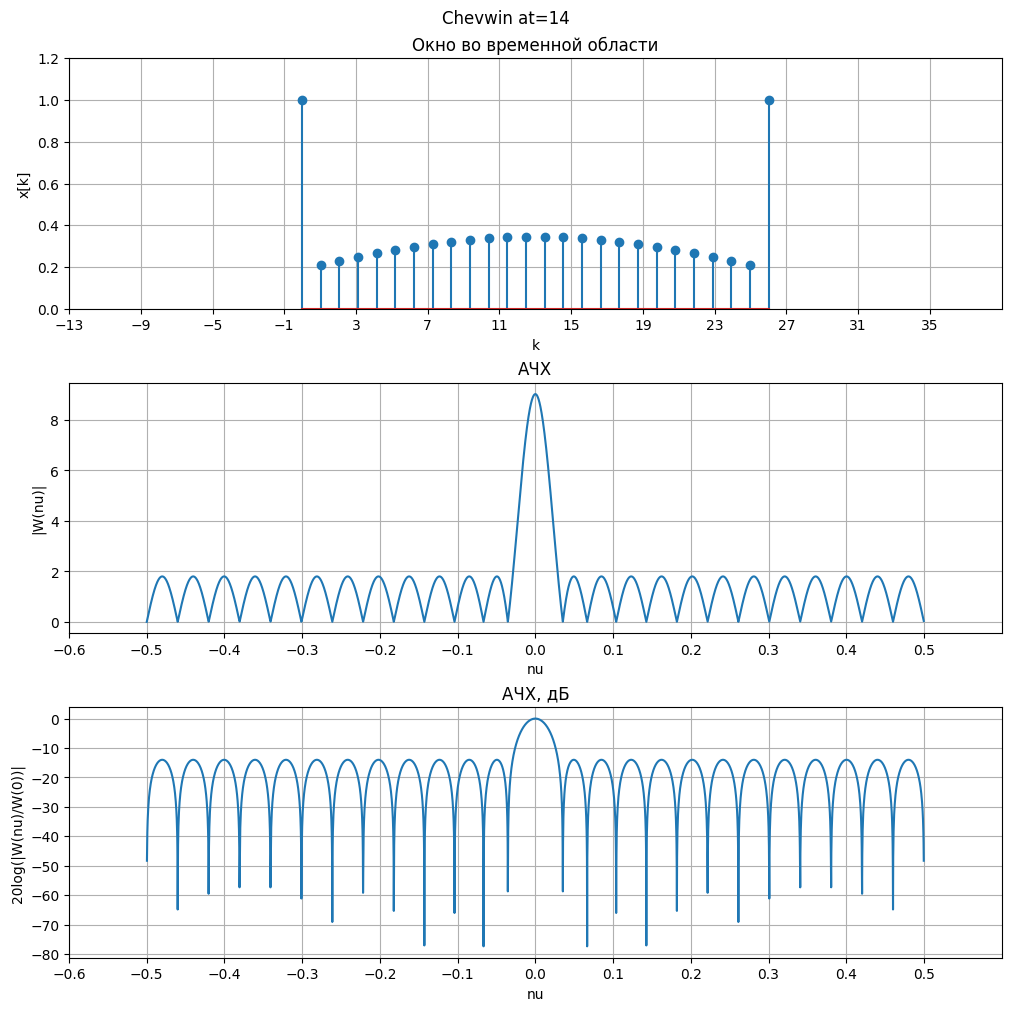

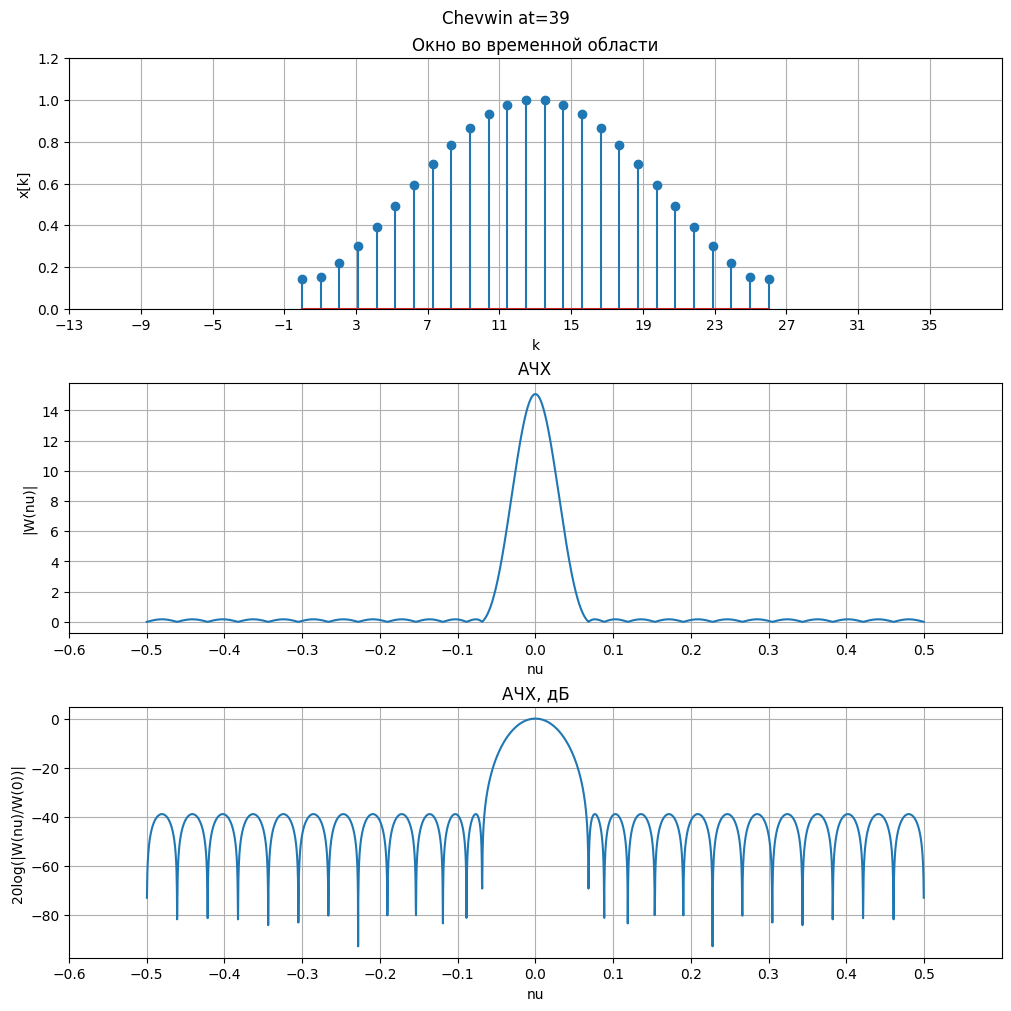

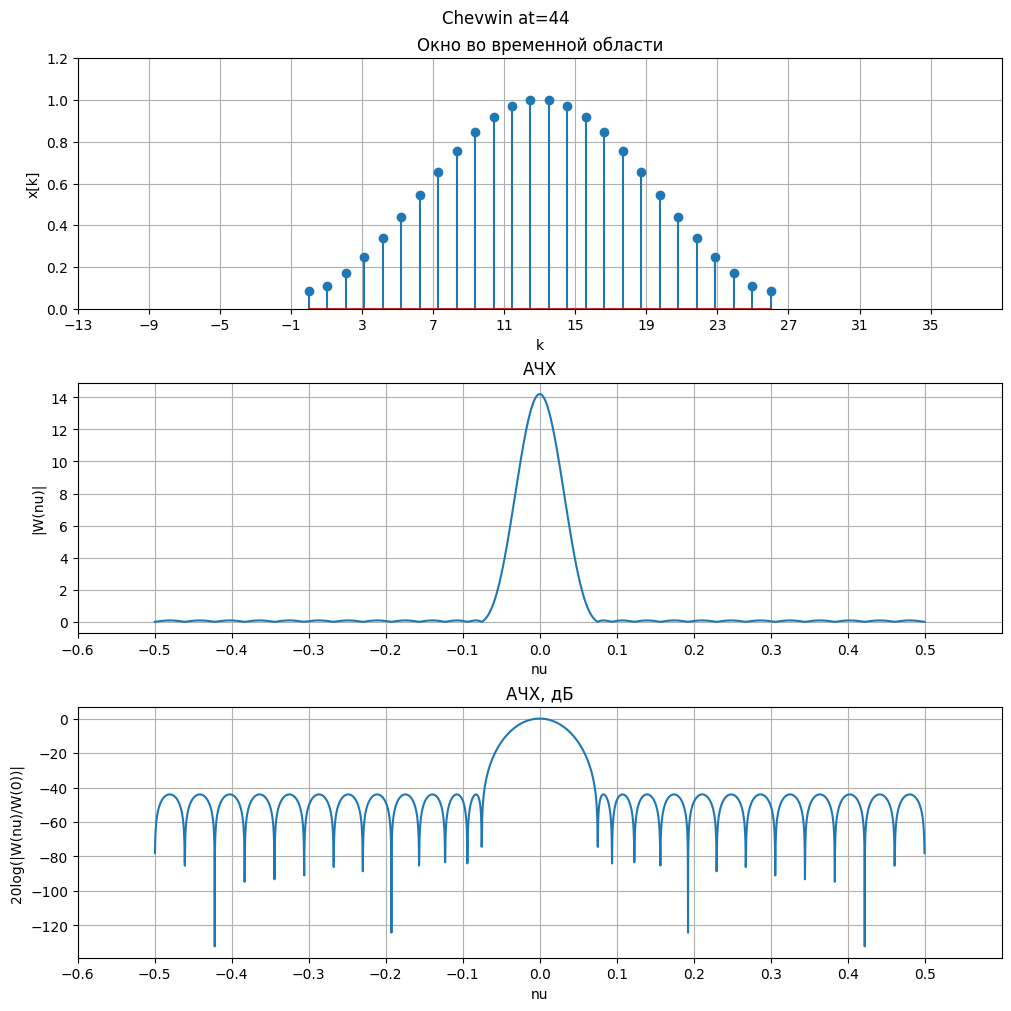

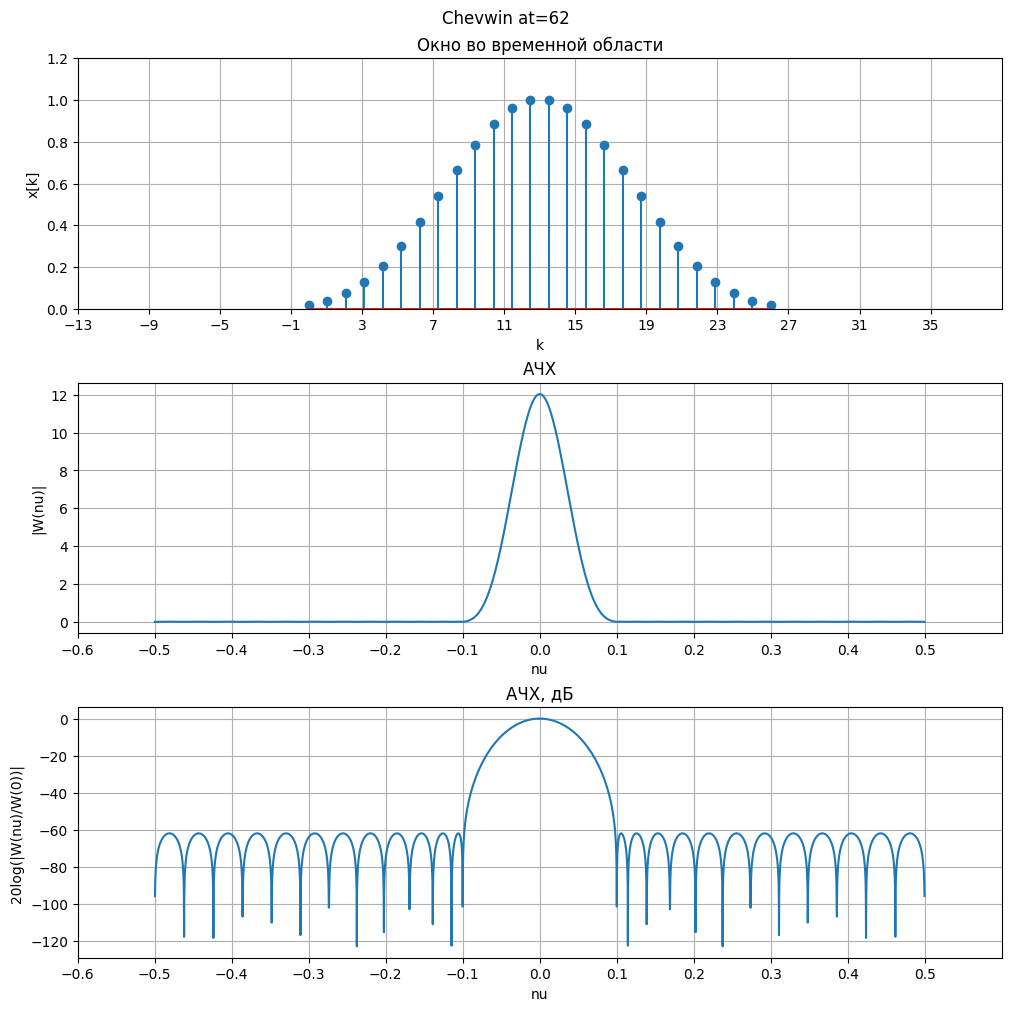

In [16]:
np.seterr(all="ignore")
for window in windows:
    window_plots(window, N)
np.seterr(all="warn")

### Задача 2.4. Различимость спектральных компонент.

In [17]:
n0 = 18
beta0 = 1.2
beta1 = 6.2
N = 128
M = 2048

x_k = np.zeros(N)
for k in range(N):
    x_k[k] = np.cos(2 * np.pi * n0 * k / 128) + np.cos(2 * np.pi * (n0 + 2) * k / 128)

<StemContainer object of 3 artists>

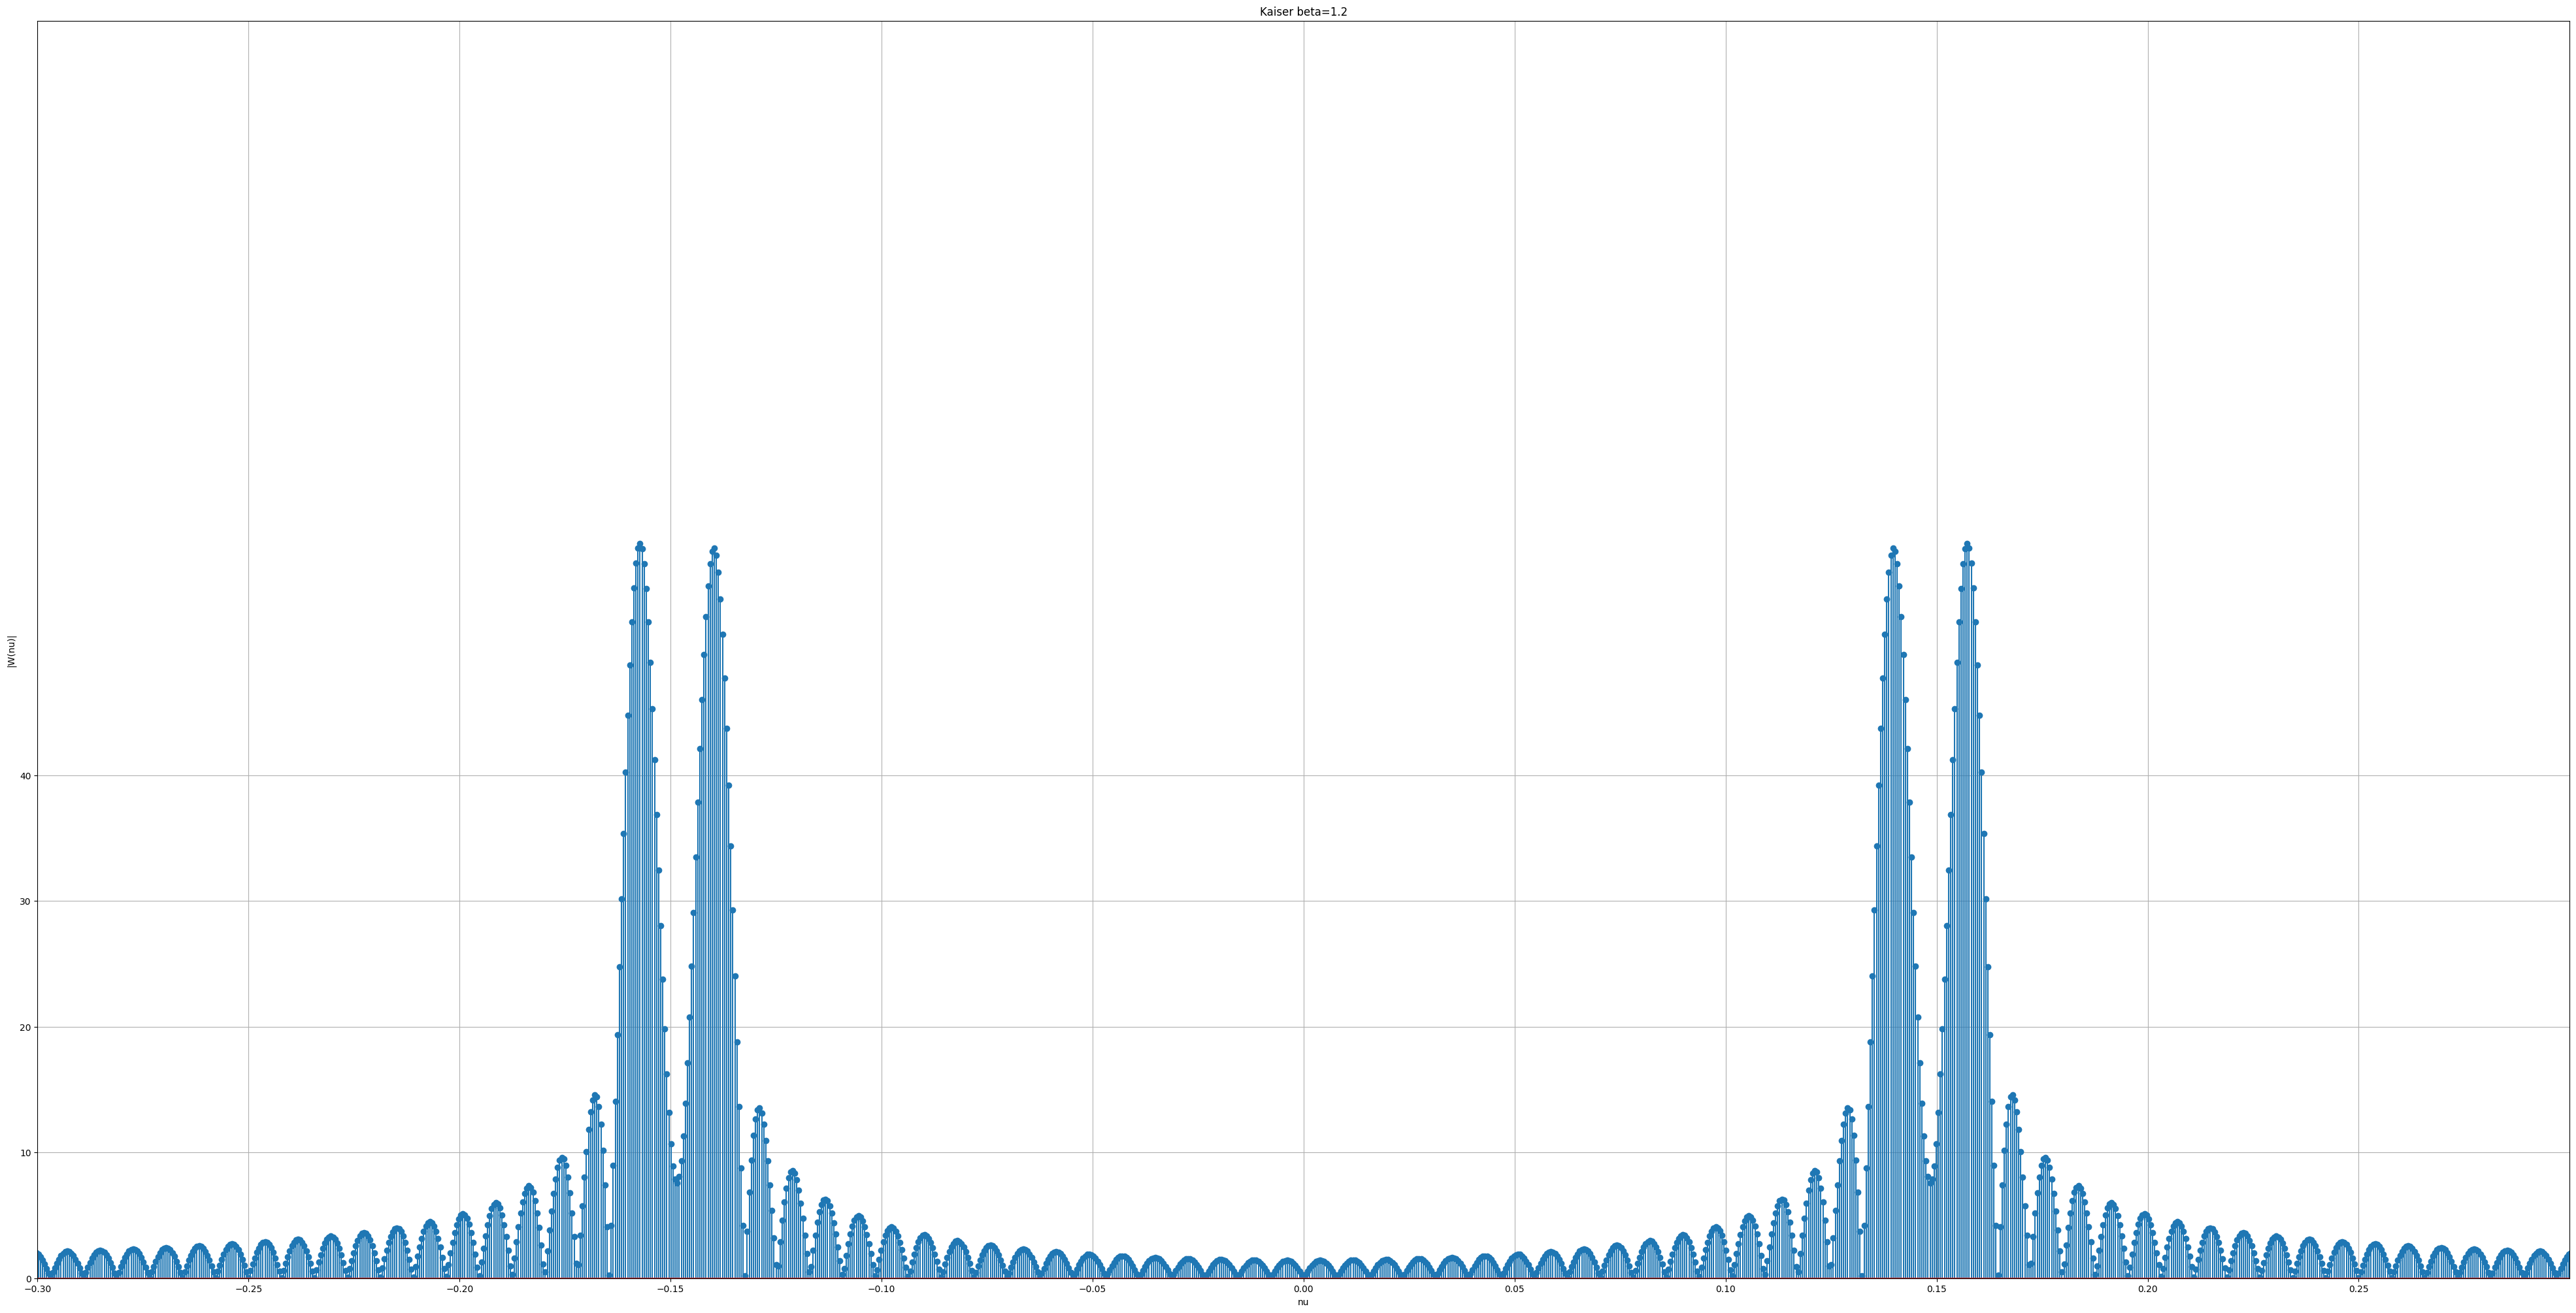

In [18]:
# Kaiser beta0

window = scp.signal.windows.kaiser(N, beta0)
y_k = np.zeros(N)
for i in range(N):
    y_k[i] = x_k[i] * window[i]

dft_y_k = np.fft.fftshift(np.fft.fft(y_k, M))
nu = np.arange(M) / M - 0.5

plt.figure(figsize=[50,25])

plt.xlim(-0.3, +0.3)
plt.xticks(np.arange(-0.3, +0.3, 0.05))

plt.ylim(0, 100)
plt.yticks(np.arange(0, 50, 10))

plt.grid()
plt.title(f"Kaiser beta={beta0}")
plt.xlabel('nu')
plt.ylabel('|W(nu)|')

plt.stem(nu, np.abs(dft_y_k))

<StemContainer object of 3 artists>

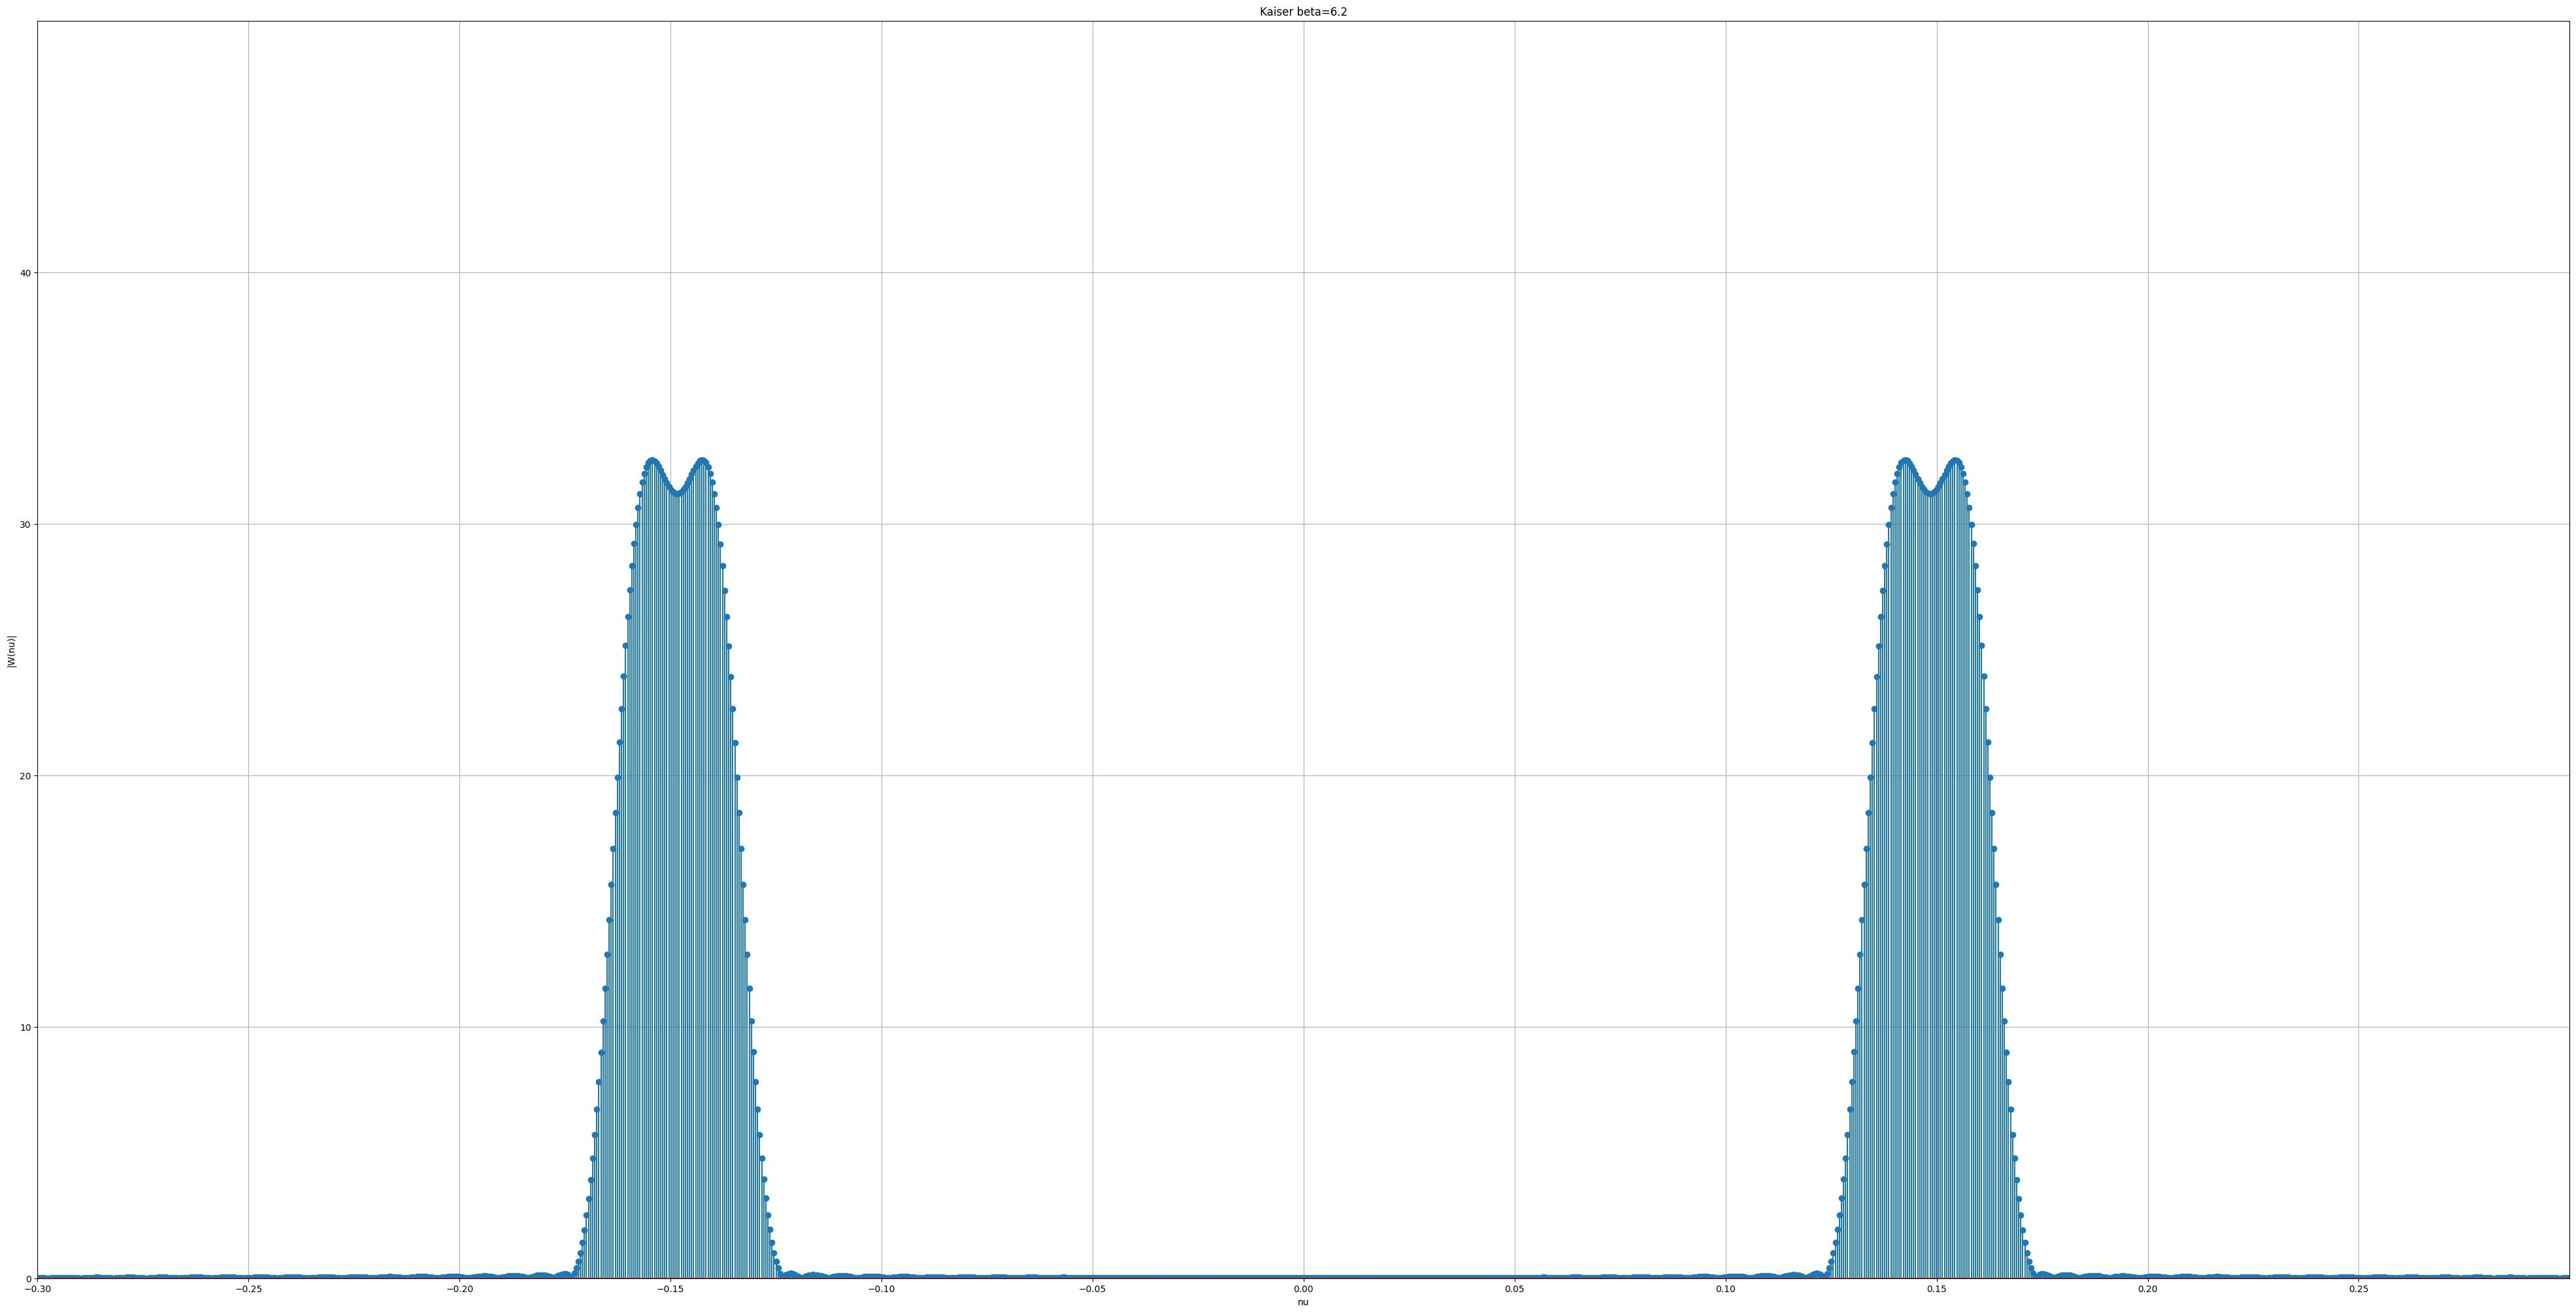

In [19]:
# Kaiser beta1

window = scp.signal.windows.kaiser(N, beta1)
y_k = np.zeros(N)
for i in range(N):
    y_k[i] = x_k[i] * window[i]

dft_y_k = np.fft.fftshift(np.fft.fft(y_k, M))
nu = np.arange(M) / M - 0.5

plt.figure(figsize=[50,25])

plt.xlim(-0.3, +0.3)
plt.xticks(np.arange(-0.3, +0.3, 0.05))

plt.ylim(0, 50)
plt.yticks(np.arange(0, 50, 10))

plt.grid()
plt.title(f"Kaiser beta={beta1}")
plt.xlabel('nu')
plt.ylabel('|W(nu)|')

plt.stem(nu, np.abs(dft_y_k))

<StemContainer object of 3 artists>

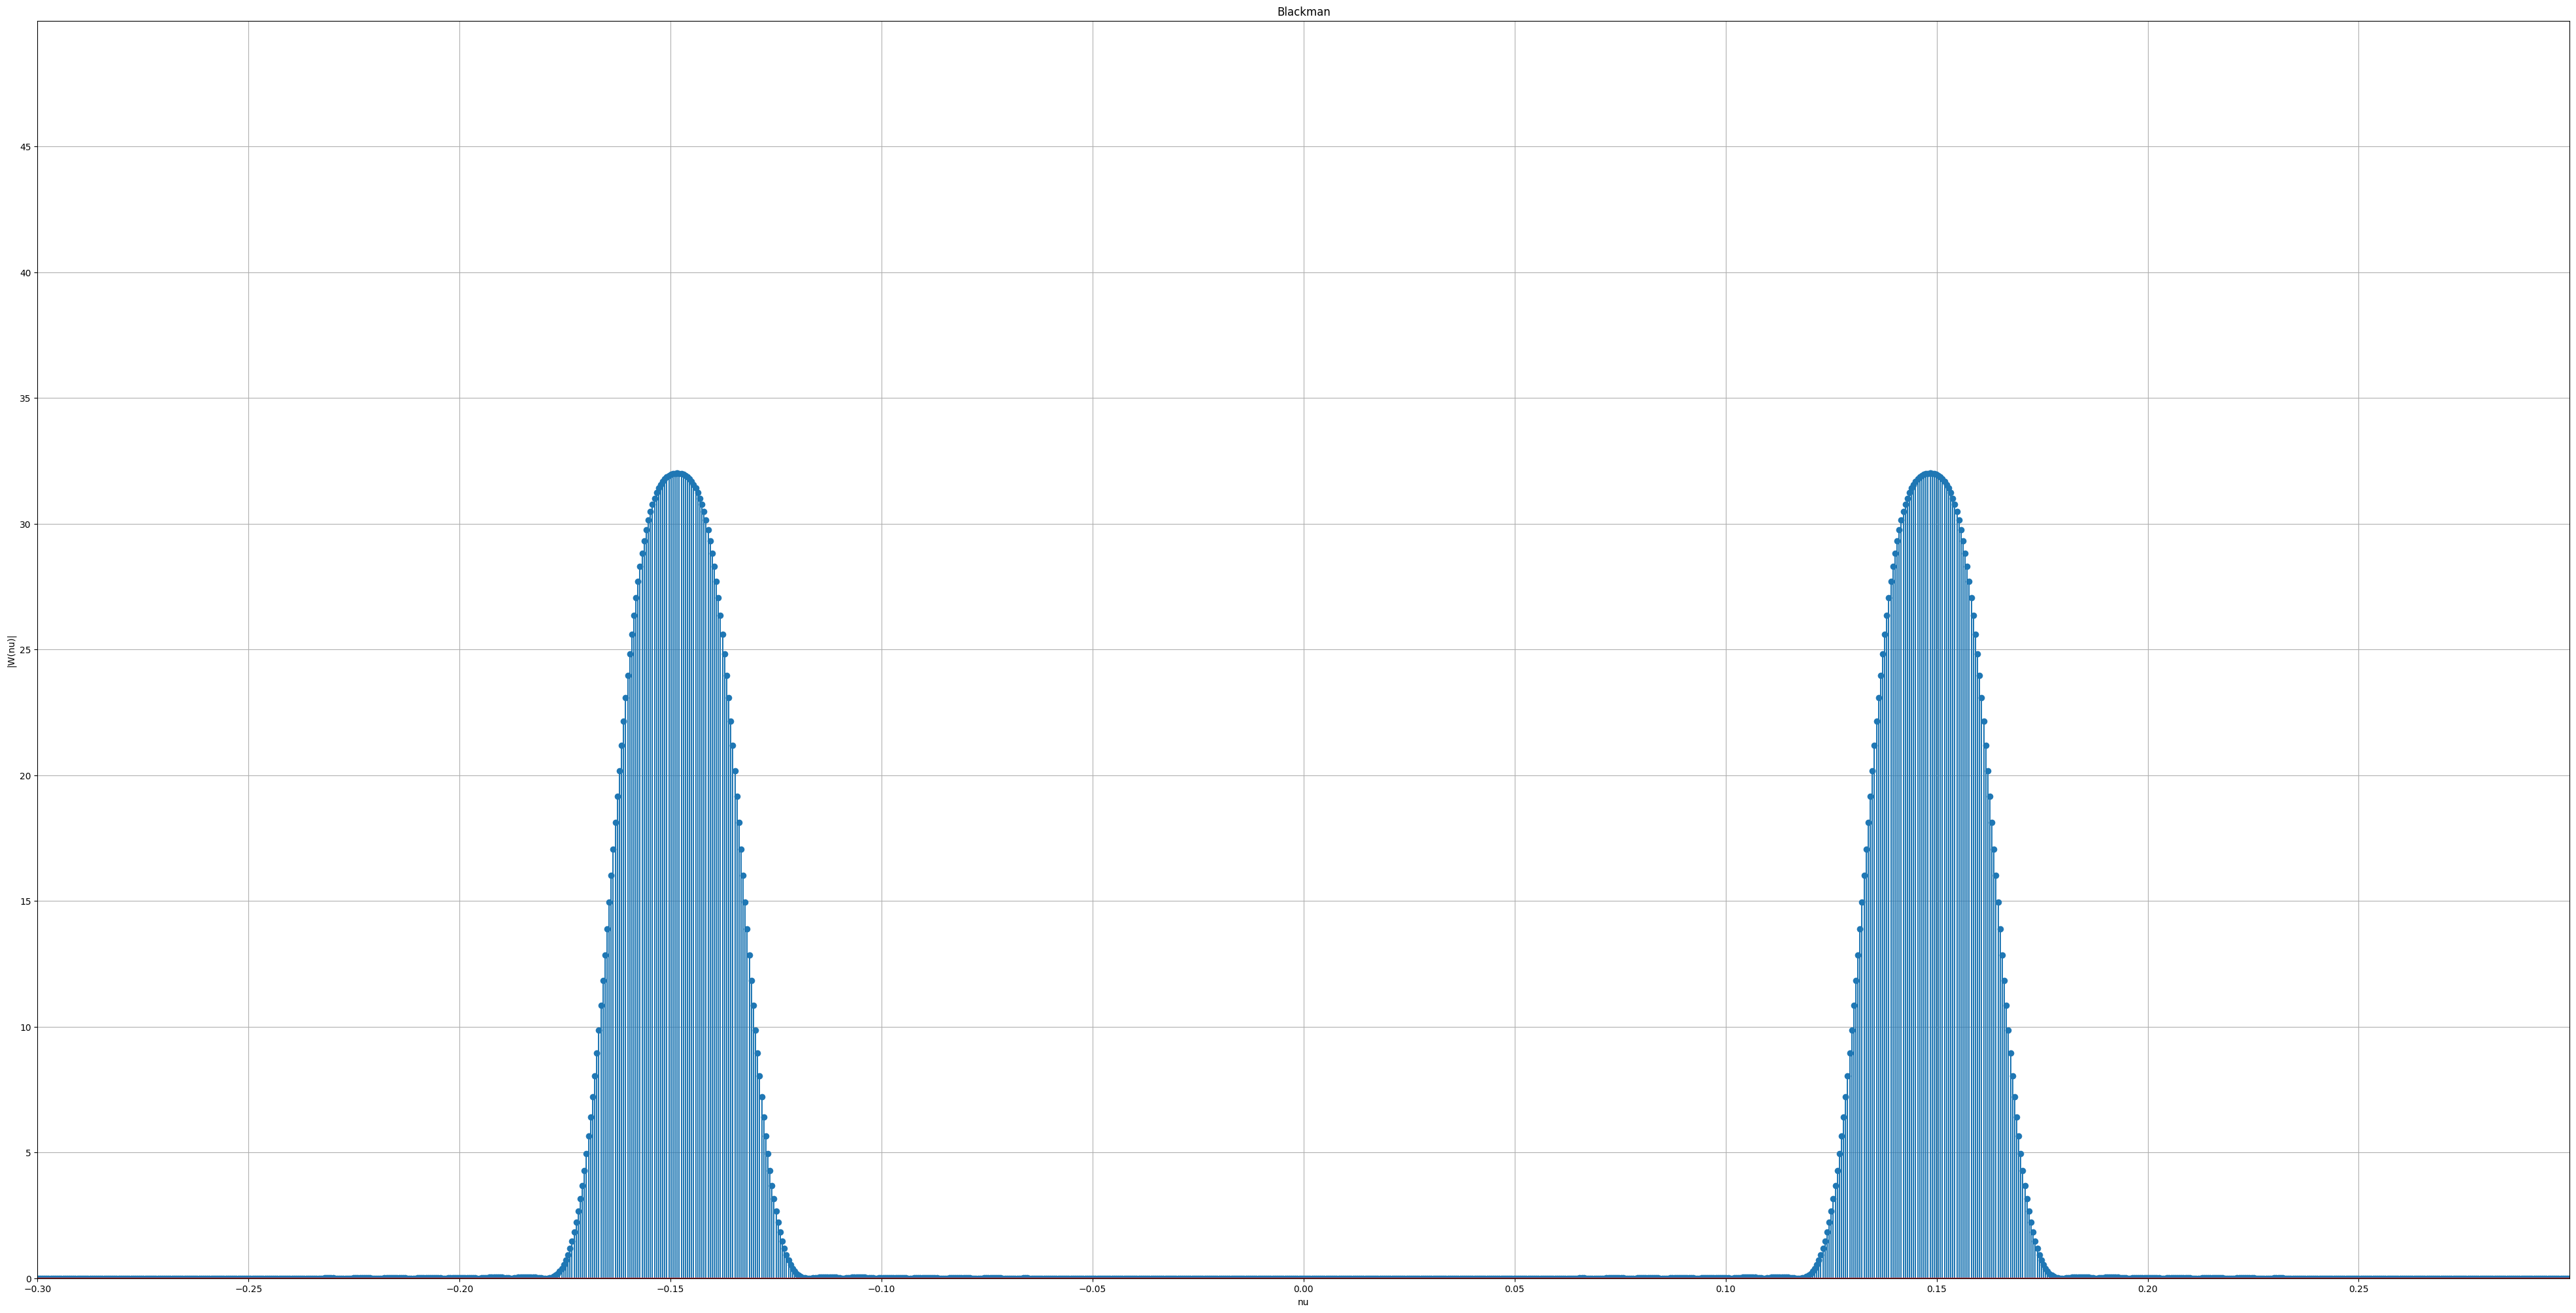

In [20]:
# Blackman

window = scp.signal.windows.blackman(N)
y_k = np.zeros(N)
for i in range(N):
    y_k[i] = x_k[i] * window[i]

dft_y_k = np.fft.fftshift(np.fft.fft(y_k, M))
nu = np.arange(M) / M - 0.5

plt.figure(figsize=[50,25])

plt.xlim(-0.3, +0.3)
plt.xticks(np.arange(-0.3, +0.3, 0.05))

plt.ylim(0, 50)
plt.yticks(np.arange(0, 50, 5))

plt.grid()
plt.title("Blackman")
plt.xlabel('nu')
plt.ylabel('|W(nu)|')

plt.stem(nu, np.abs(dft_y_k))

### Задача 2.5. Маскировка слабой гармоники боковыми лепестками окна.

In [21]:
N = 64
n = 4096

m1 = 0
m2 = -2
m3 = +3

a1 = 10 + 3
a2 = a1 / 6
a3 = a1 / 2

x_k = np.zeros(N)
for k in range(N):
    x_k[k] = a1 * np.cos(2 * np.pi * (a1 + m1) * k / N) \
           + a2 * np.cos(2 * np.pi * (a1 + m2) * k / N) \
           - a3 * np.cos(2 * np.pi * (a1 + m3) * k / N)

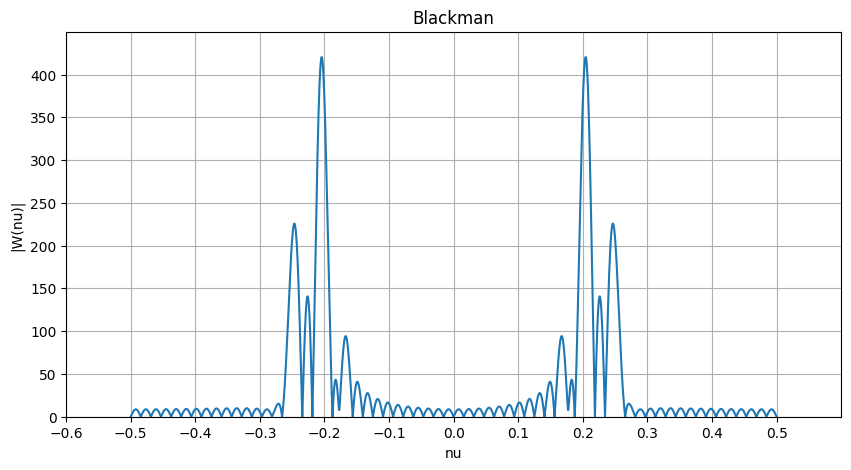

In [22]:
# Boxcar

window = scp.signal.windows.boxcar(N)
y_k = np.zeros(N)
for i in range(N):
    y_k[i] = x_k[i] * window[i]

dft_y_k = np.fft.fftshift(np.fft.fft(y_k, n))
nu = np.arange(n) / n - 0.5

plt.figure(figsize=[10,5])

plt.xlim(-0.6, +0.6)
plt.xticks(np.arange(-0.6, +0.6, 0.1))

plt.ylim(0, 450)
plt.yticks(np.arange(0, 450, 50))

plt.grid()
plt.title("Blackman")
plt.xlabel('nu')
plt.ylabel('|W(nu)|')

plt.plot(nu, np.abs(dft_y_k))

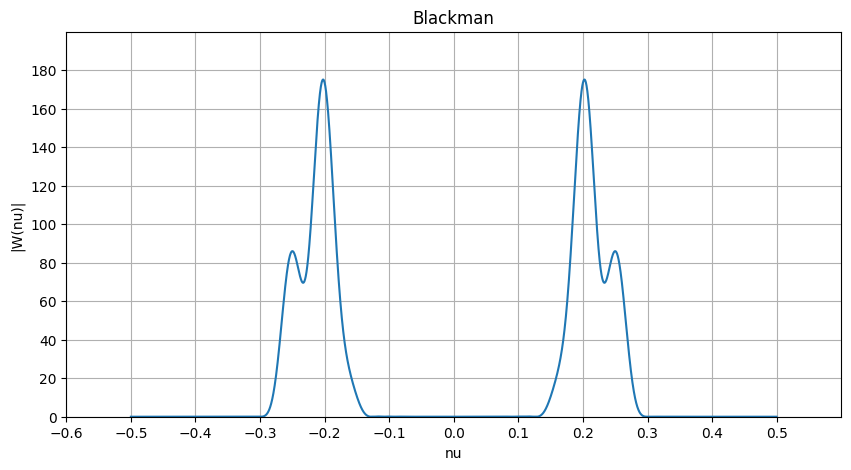

In [23]:
# Blackman

window = scp.signal.windows.blackman(N)
y_k = np.zeros(N)
for i in range(N):
    y_k[i] = x_k[i] * window[i]

dft_y_k = np.fft.fftshift(np.fft.fft(y_k, n))
nu = np.arange(n) / n - 0.5

plt.figure(figsize=[10,5])

plt.xlim(-0.6, +0.6)
plt.xticks(np.arange(-0.6, +0.6, 0.1))

plt.ylim(0, 200)
plt.yticks(np.arange(0, 200, 20))

plt.grid()
plt.title("Blackman")
plt.xlabel('nu')
plt.ylabel('|W(nu)|')

plt.plot(nu, np.abs(dft_y_k))

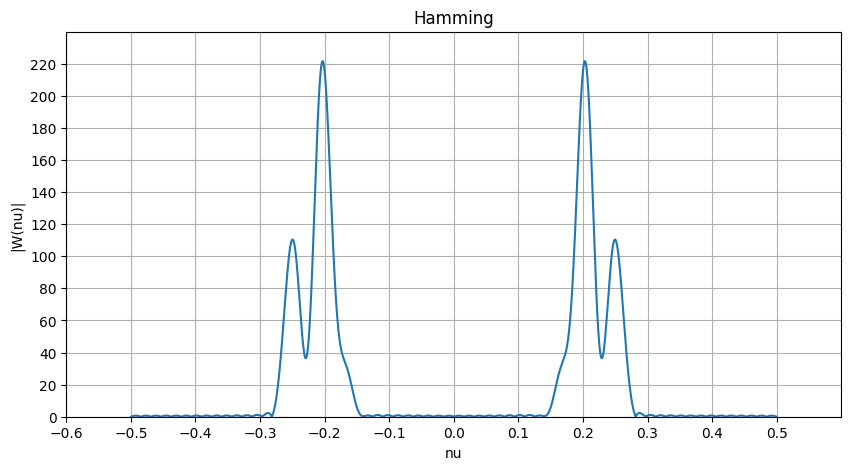

In [24]:
# Hamming

window = scp.signal.windows.hamming(N)
y_k = np.zeros(N)
for i in range(N):
    y_k[i] = x_k[i] * window[i]

dft_y_k = np.fft.fftshift(np.fft.fft(y_k, n))
nu = np.arange(n) / n - 0.5

plt.figure(figsize=[10,5])

plt.xlim(-0.6, +0.6)
plt.xticks(np.arange(-0.6, +0.6, 0.1))

plt.ylim(0, 240)
plt.yticks(np.arange(0, 240, 20))

plt.grid()
plt.title("Hamming")
plt.xlabel('nu')
plt.ylabel('|W(nu)|')

plt.plot(nu, np.abs(dft_y_k))

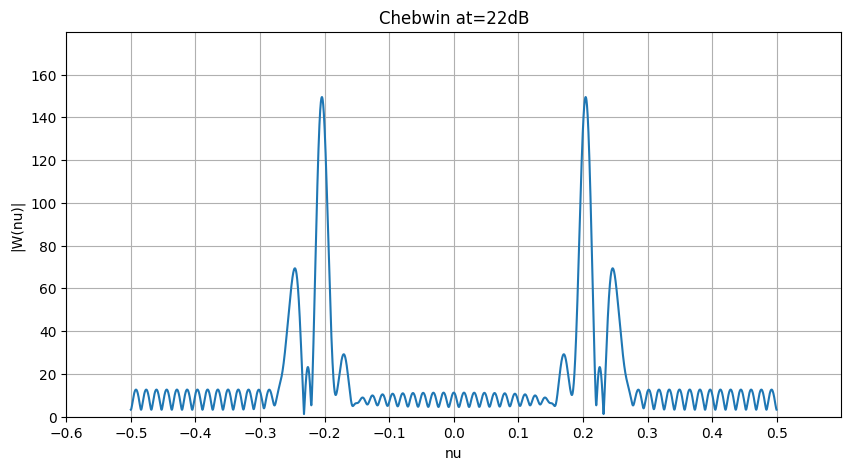

In [25]:
# Chebwin

at = 22
window = scp.signal.windows.chebwin(N, at)
y_k = np.zeros(N)
for i in range(N):
    y_k[i] = x_k[i] * window[i]

dft_y_k = np.fft.fftshift(np.fft.fft(y_k, n))
nu = np.arange(n) / n - 0.5

plt.figure(figsize=[10,5])

plt.xlim(-0.6, +0.6)
plt.xticks(np.arange(-0.6, +0.6, 0.1))

plt.ylim(0, 180)
plt.yticks(np.arange(0, 180, 20))

plt.grid()
plt.title(f"Chebwin at={at}dB")
plt.xlabel('nu')
plt.ylabel('|W(nu)|')

plt.plot(nu, np.abs(dft_y_k))

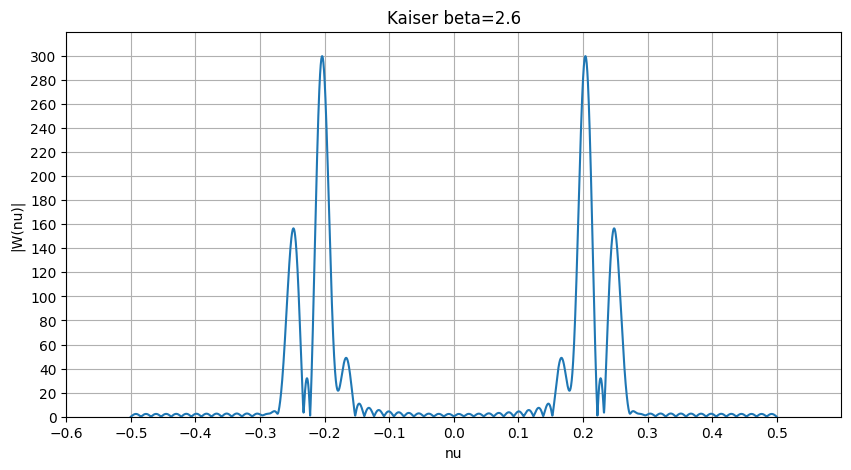

In [26]:
# Kaiser

beta = 2.6
window = scp.signal.windows.kaiser(N, beta)
y_k = np.zeros(N)
for i in range(N):
    y_k[i] = x_k[i] * window[i]

dft_y_k = np.fft.fftshift(np.fft.fft(y_k, n))
nu = np.arange(n) / n - 0.5

plt.figure(figsize=[10,5])

plt.xlim(-0.6, +0.6)
plt.xticks(np.arange(-0.6, +0.6, 0.1))

plt.ylim(0, 320)
plt.yticks(np.arange(0, 320, 20))

plt.grid()
plt.title(f"Kaiser beta={beta}")
plt.xlabel('nu')
plt.ylabel('|W(nu)|')

plt.plot(nu, np.abs(dft_y_k))

### Задача 2.6. Амплитудная модуляция спектра

In [27]:
n0 = 18.5
N = 128

x_k = np.zeros(N)
for k in range(N):
    x_k[k] = np.cos(2 * np.pi * n0 * k / N)

0.9810288856472043
1.0


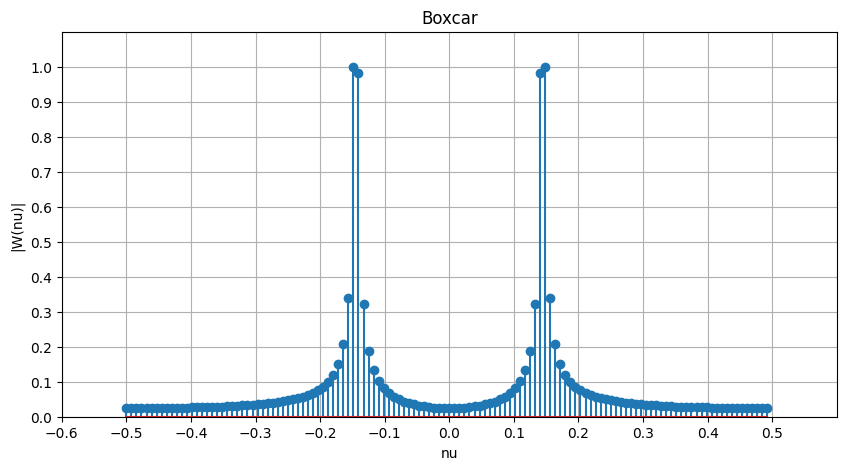

In [28]:
# Boxcar

window = scp.signal.windows.boxcar(N)
y_k = np.zeros(N)
for i in range(N):
    y_k[i] = x_k[i] * window[i]

dft_y_k = np.fft.fftshift(np.fft.fft(y_k))
dft_y_k = dft_y_k / np.max(np.abs(dft_y_k))
nu = np.arange(N) / N - 0.5

plt.figure(figsize=[10,5])

plt.xlim(-0.6, +0.6)
plt.xticks(np.arange(-0.6, +0.6, 0.1))

plt.ylim(0, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.grid()
plt.title("Boxcar")
plt.xlabel('nu')
plt.ylabel('|W(nu)|')

plt.stem(nu, np.abs(dft_y_k))

print(np.abs(dft_y_k[ceil(64 - n0)]))
print(np.abs(dft_y_k[ceil(64 - n0) - 1]))

0.9999999999999999
0.9999770451659298


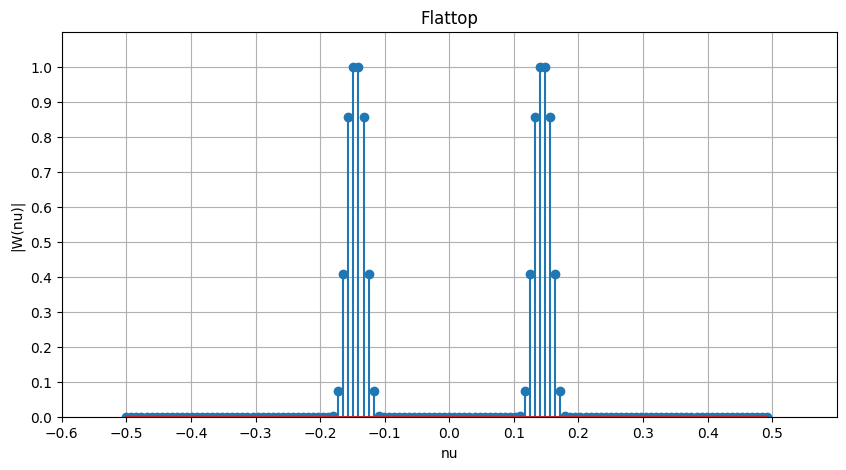

In [29]:
# Flattop

window = scp.signal.windows.flattop(N)
y_k = np.zeros(N)
for i in range(N):
    y_k[i] = x_k[i] * window[i]

dft_y_k = np.fft.fftshift(np.fft.fft(y_k))
dft_y_k = dft_y_k / np.max(np.abs(dft_y_k))
nu = np.arange(N) / N - 0.5

plt.figure(figsize=[10,5])

plt.xlim(-0.6, +0.6)
plt.xticks(np.arange(-0.6, +0.6, 0.1))

plt.ylim(0, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.grid()
plt.title("Flattop")
plt.xlabel('nu')
plt.ylabel('|W(nu)|')

plt.stem(nu, np.abs(dft_y_k))

print(np.abs(dft_y_k[ceil(64 - n0)]))
print(np.abs(dft_y_k[ceil(64 - n0) - 1]))

## Модуль 3. Кратковременное дискретное преобразование Фурье (STFT)

### Задачи на модулирование

### Спектрограмма аудиофайла.

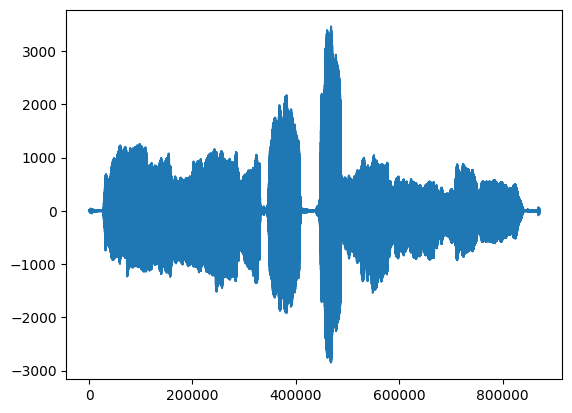

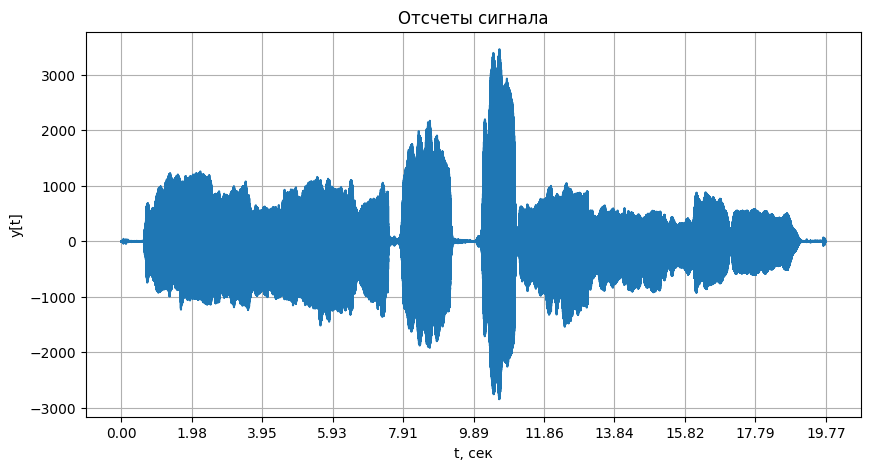

In [14]:
samplerate, wav_data = scp.io.wavfile.read("data/flute.wav")

plt.plot(wav_data)

n = len(data)
y_k = np.array(wav_data)

duration = n / samplerate
t_k = np.linspace(0, duration, n)

plt.figure(figsize=[10,5])
plt.xticks(np.arange(0, duration + 1/samplerate, duration/10))

plt.grid()
plt.title('Отсчеты сигнала')
plt.xlabel('t, сек')
plt.ylabel('y[t]')

plt.plot(t_k, y_k)

In [145]:
M = 40000  # длина окна (сегмента)
N = 8 * M  # размерность ДПФ
L = 0      # число точек перекрытия
R = M - L  # единичный сдвиг окна

window = scp.signal.windows.flattop(M)

# f   - Array of sample frequencies.
# t   - Array of segment times.
# Zxx - STFT of x
f, t, Zxx = scp.signal.stft(y_k, window=window, nperseg=M, noverlap=L, nfft=N)

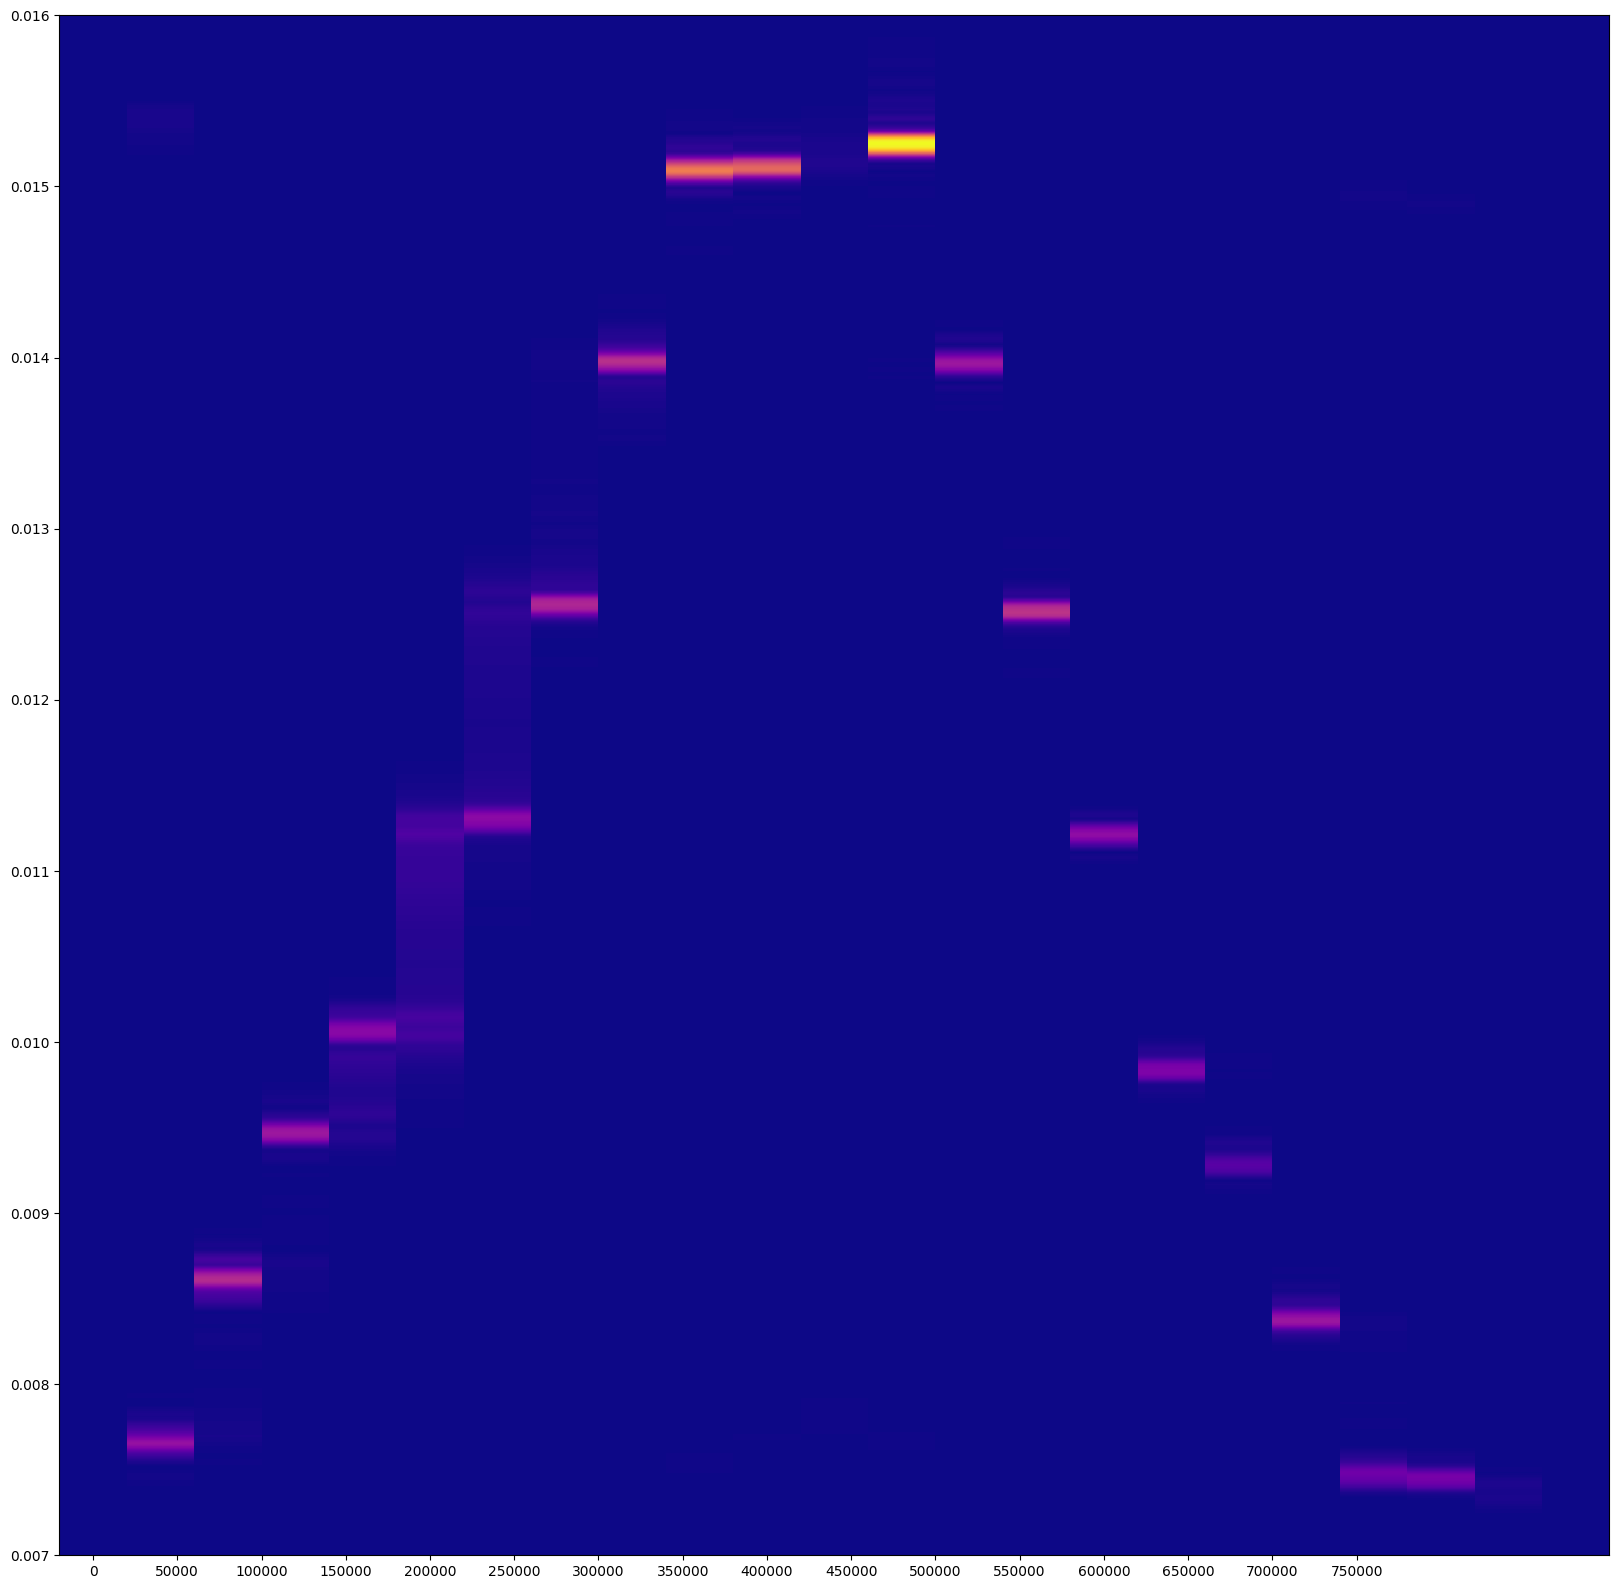

In [146]:
plt.figure(figsize=[20,20])
plt.ylim(0.007, 0.016)
plt.xticks(np.arange(0, 800000, 50000))
plt.pcolormesh(t, f, np.abs(Zxx), cmap='plasma')

In [151]:
seg_dur = R / samplerate
print(f"Window duration {seg_dur} sec")

total_dur = len(y_k) / samplerate
print(f"Total duration {total_dur}")

seg_num = int(total_dur / seg_dur)
print(f"Segments number {seg_num}")

Window duration 0.9070294784580499 sec
Total duration 19.770839002267575
Segments number 21


### Спектрограмма ЛЧМ сигнала.

In [156]:
f0 = 90
f1 = 850
fs = 2000 # частота дискретизации
T = 2     # длительность
M = 512   # начальный размер

# Временная ось
t = np.arange(0, T, 1 / fs)

# ЛЧМ-сигнал
x = scp.signal.chirp(t, f0=f0, f1=f1, t1=T, method='linear')

In [174]:
def plot_chirp(window, nseg=5, nperseg=200, m=M):
    """
    window - количество сегментов
    nseg - число сегментов
    """
    plt.figure(figsize=[30, 24])

    gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])

    plt.subplot(gs[0])
    plt.plot(np.arange(x.size), x, '.-b')
    plt.xlim([0, x.size])
    plt.tight_layout()
    plt.grid()
    plt.ylabel('$x[k]$')
    plt.xlabel('$k$')

    plt.subplot(gs[1])
    X_n = np.fft.fft(x)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b')
    plt.ylabel('$|X[n]|$')
    plt.xlabel('$f_n$, Гц')

    for u in range(nseg):
        plt.subplot(gs[u*2+2])
        y = x[nperseg*u : nperseg*u + nperseg] * window(nperseg)
        plt.plot(np.arange(nperseg*u, nperseg*u + nperseg), y, '.-C%i' %u)

        plt.xlim([0, x.size])
        plt.ylabel(f'$w[k]x[k+{u}H]$')
        plt.xlabel('$k$')
        plt.grid()
        plt.yticks([-1, 0, 1])
        plt.tight_layout()

        plt.subplot(gs[u*2+3])
        X_n=np.fft.fft(y, m)
        plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0 : X_n.size // 2]), '.-C%i'  %u)
        plt.ylabel(f'$|X_{u}[n]|$')
        plt.xlabel('$f_n,$ Гц')
        plt.tight_layout()

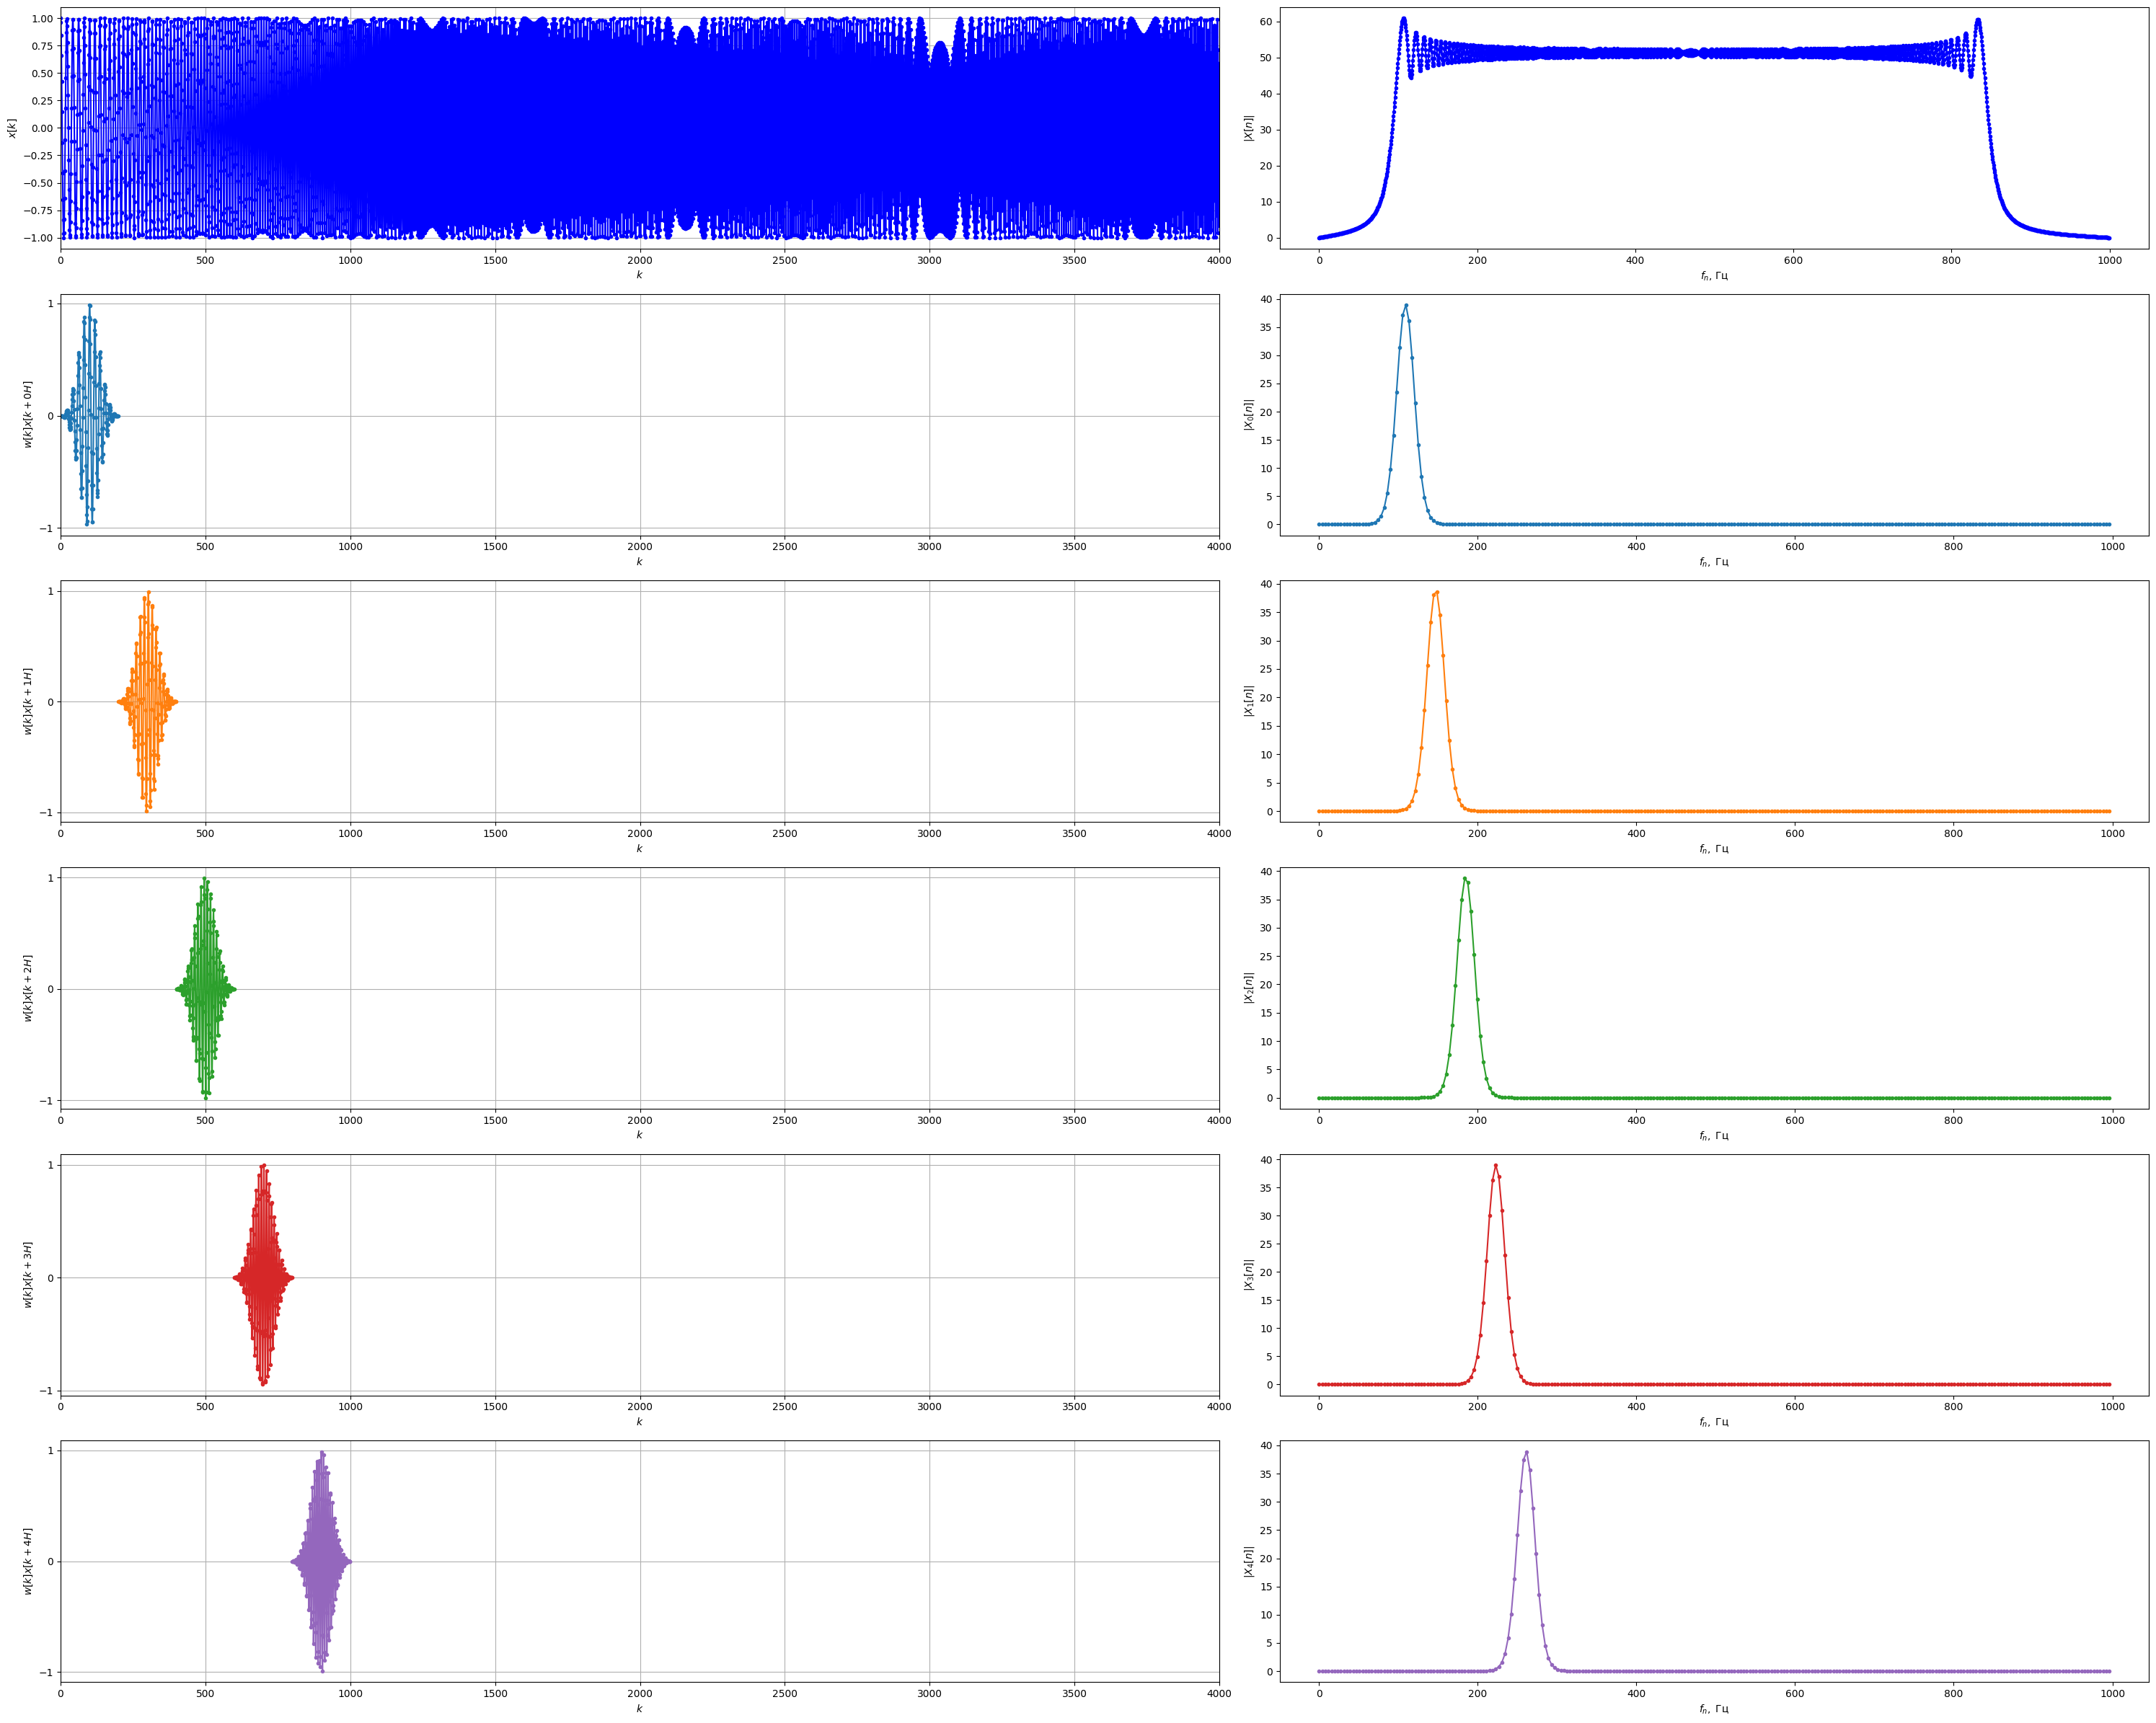

In [175]:
plot_chirp(scp.signal.windows.blackman)

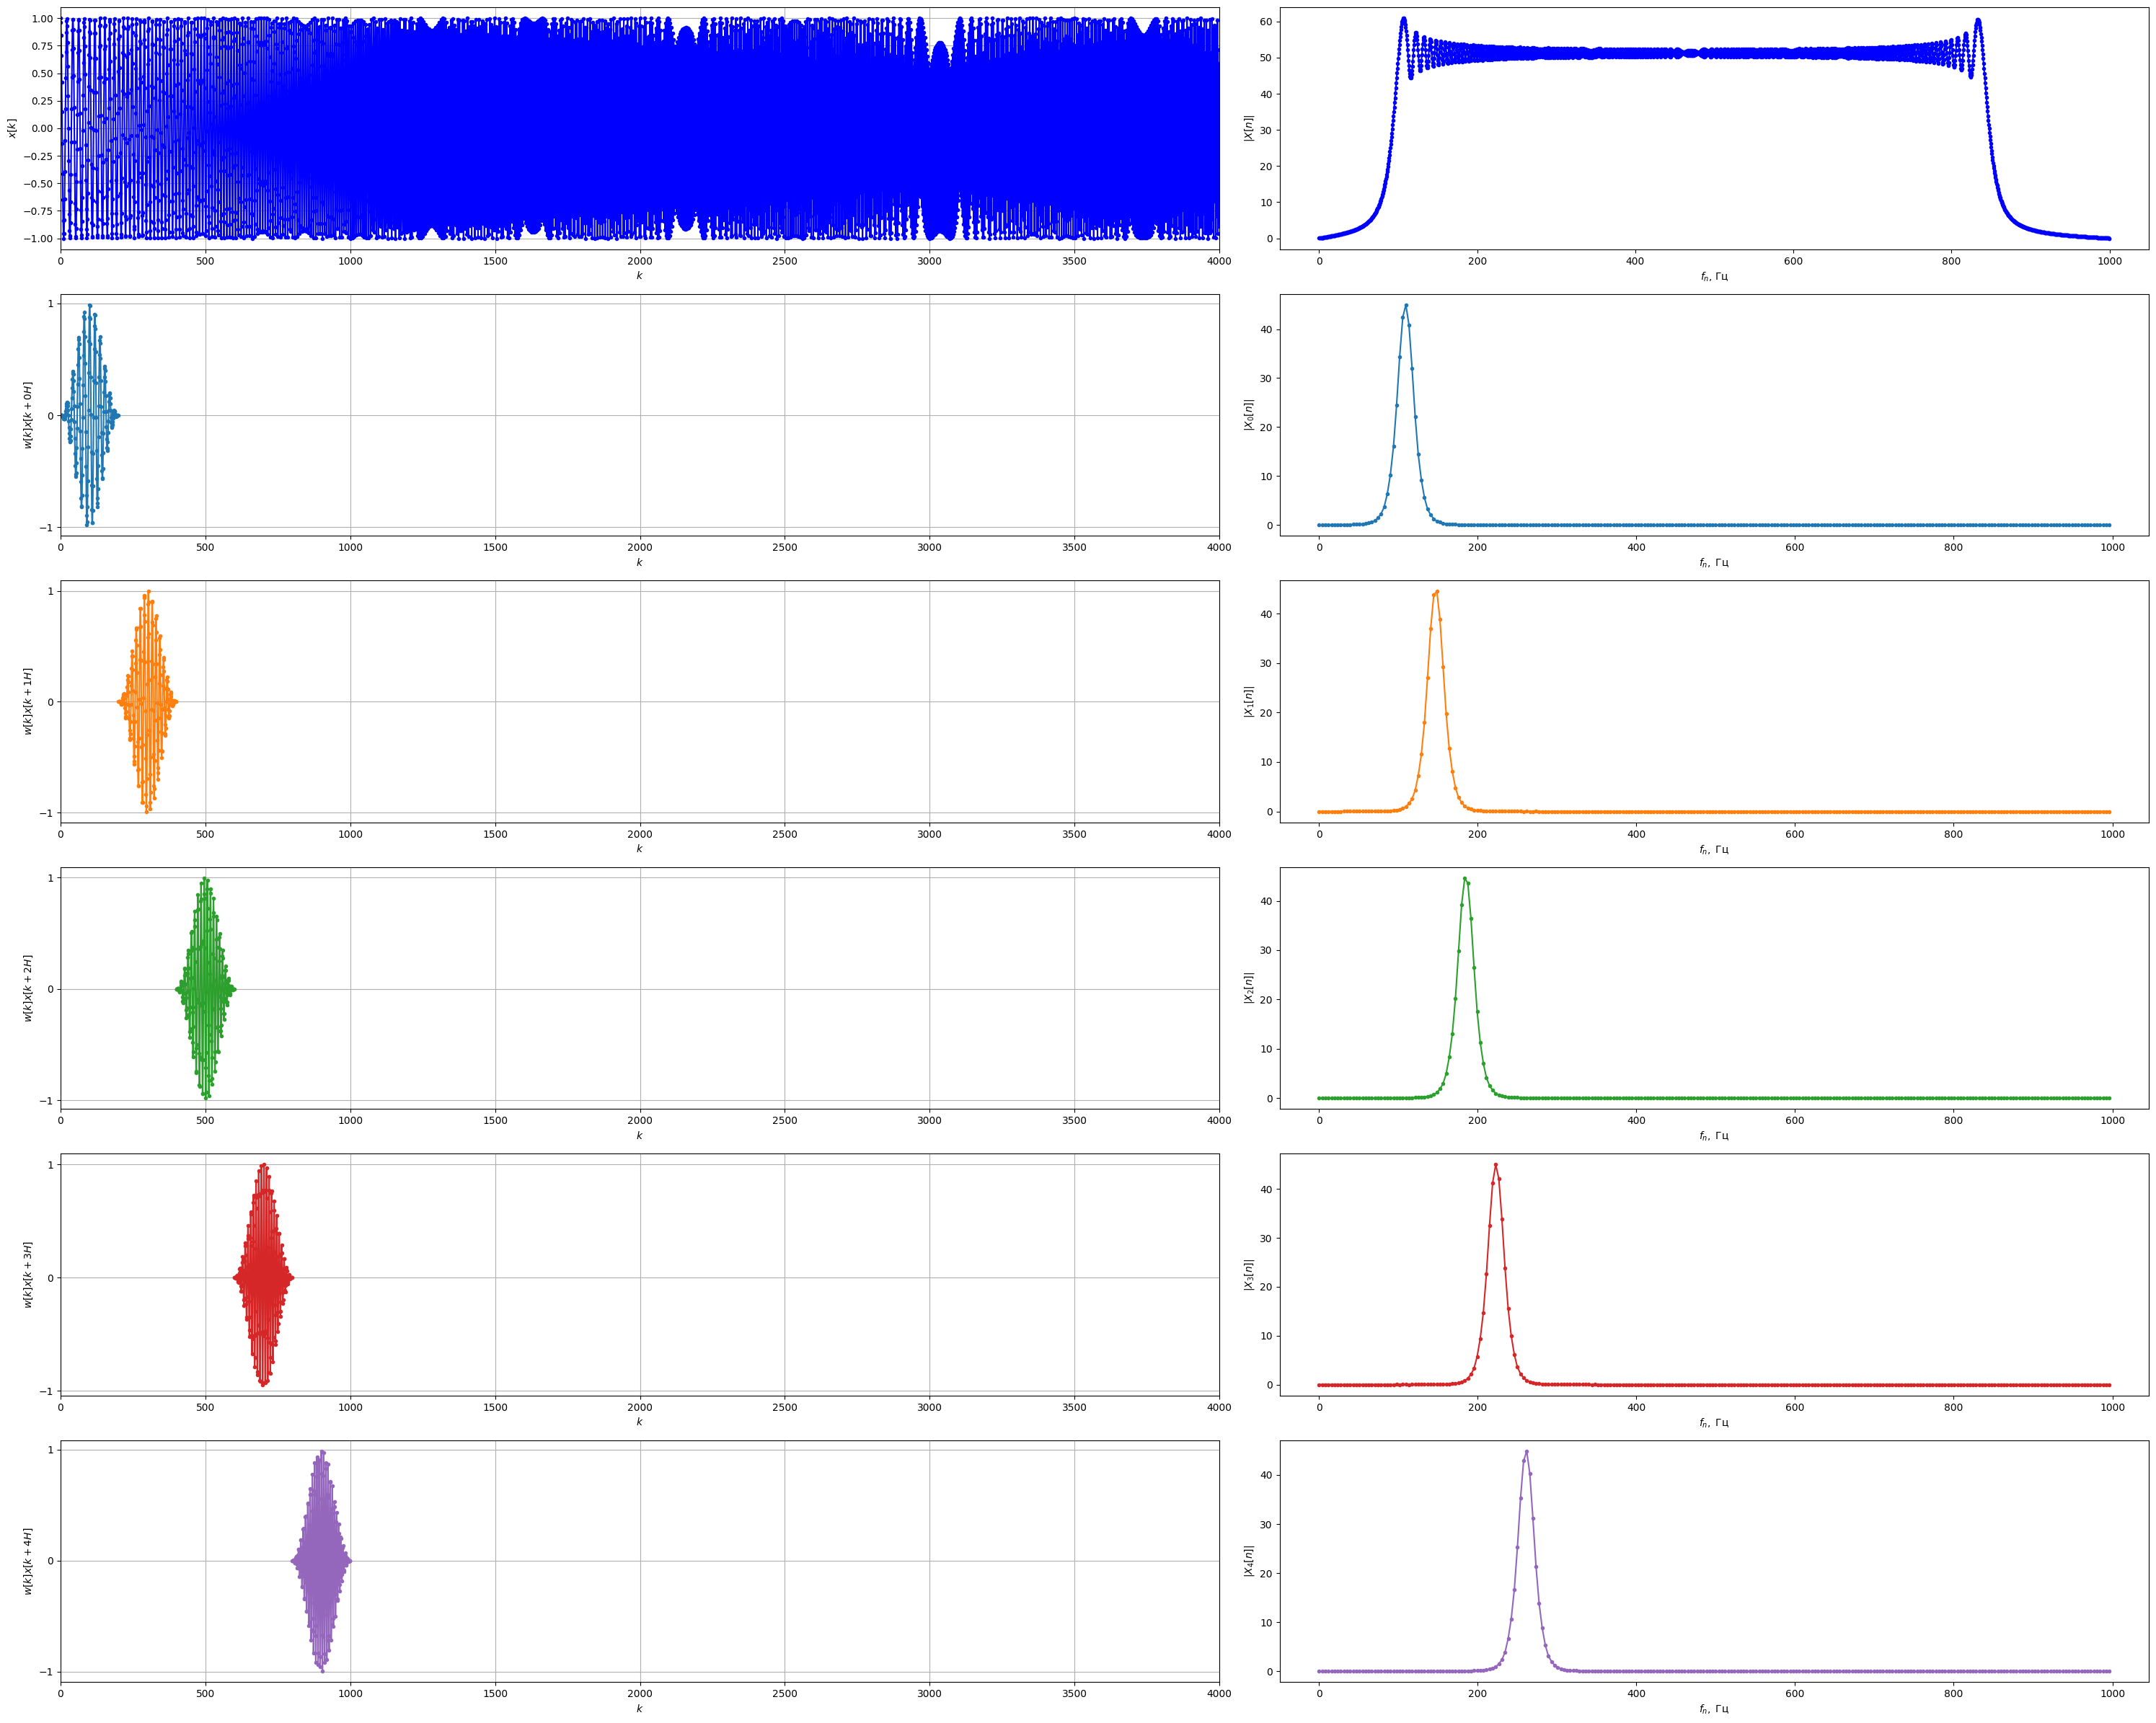

In [176]:
plot_chirp(scp.signal.windows.hann)

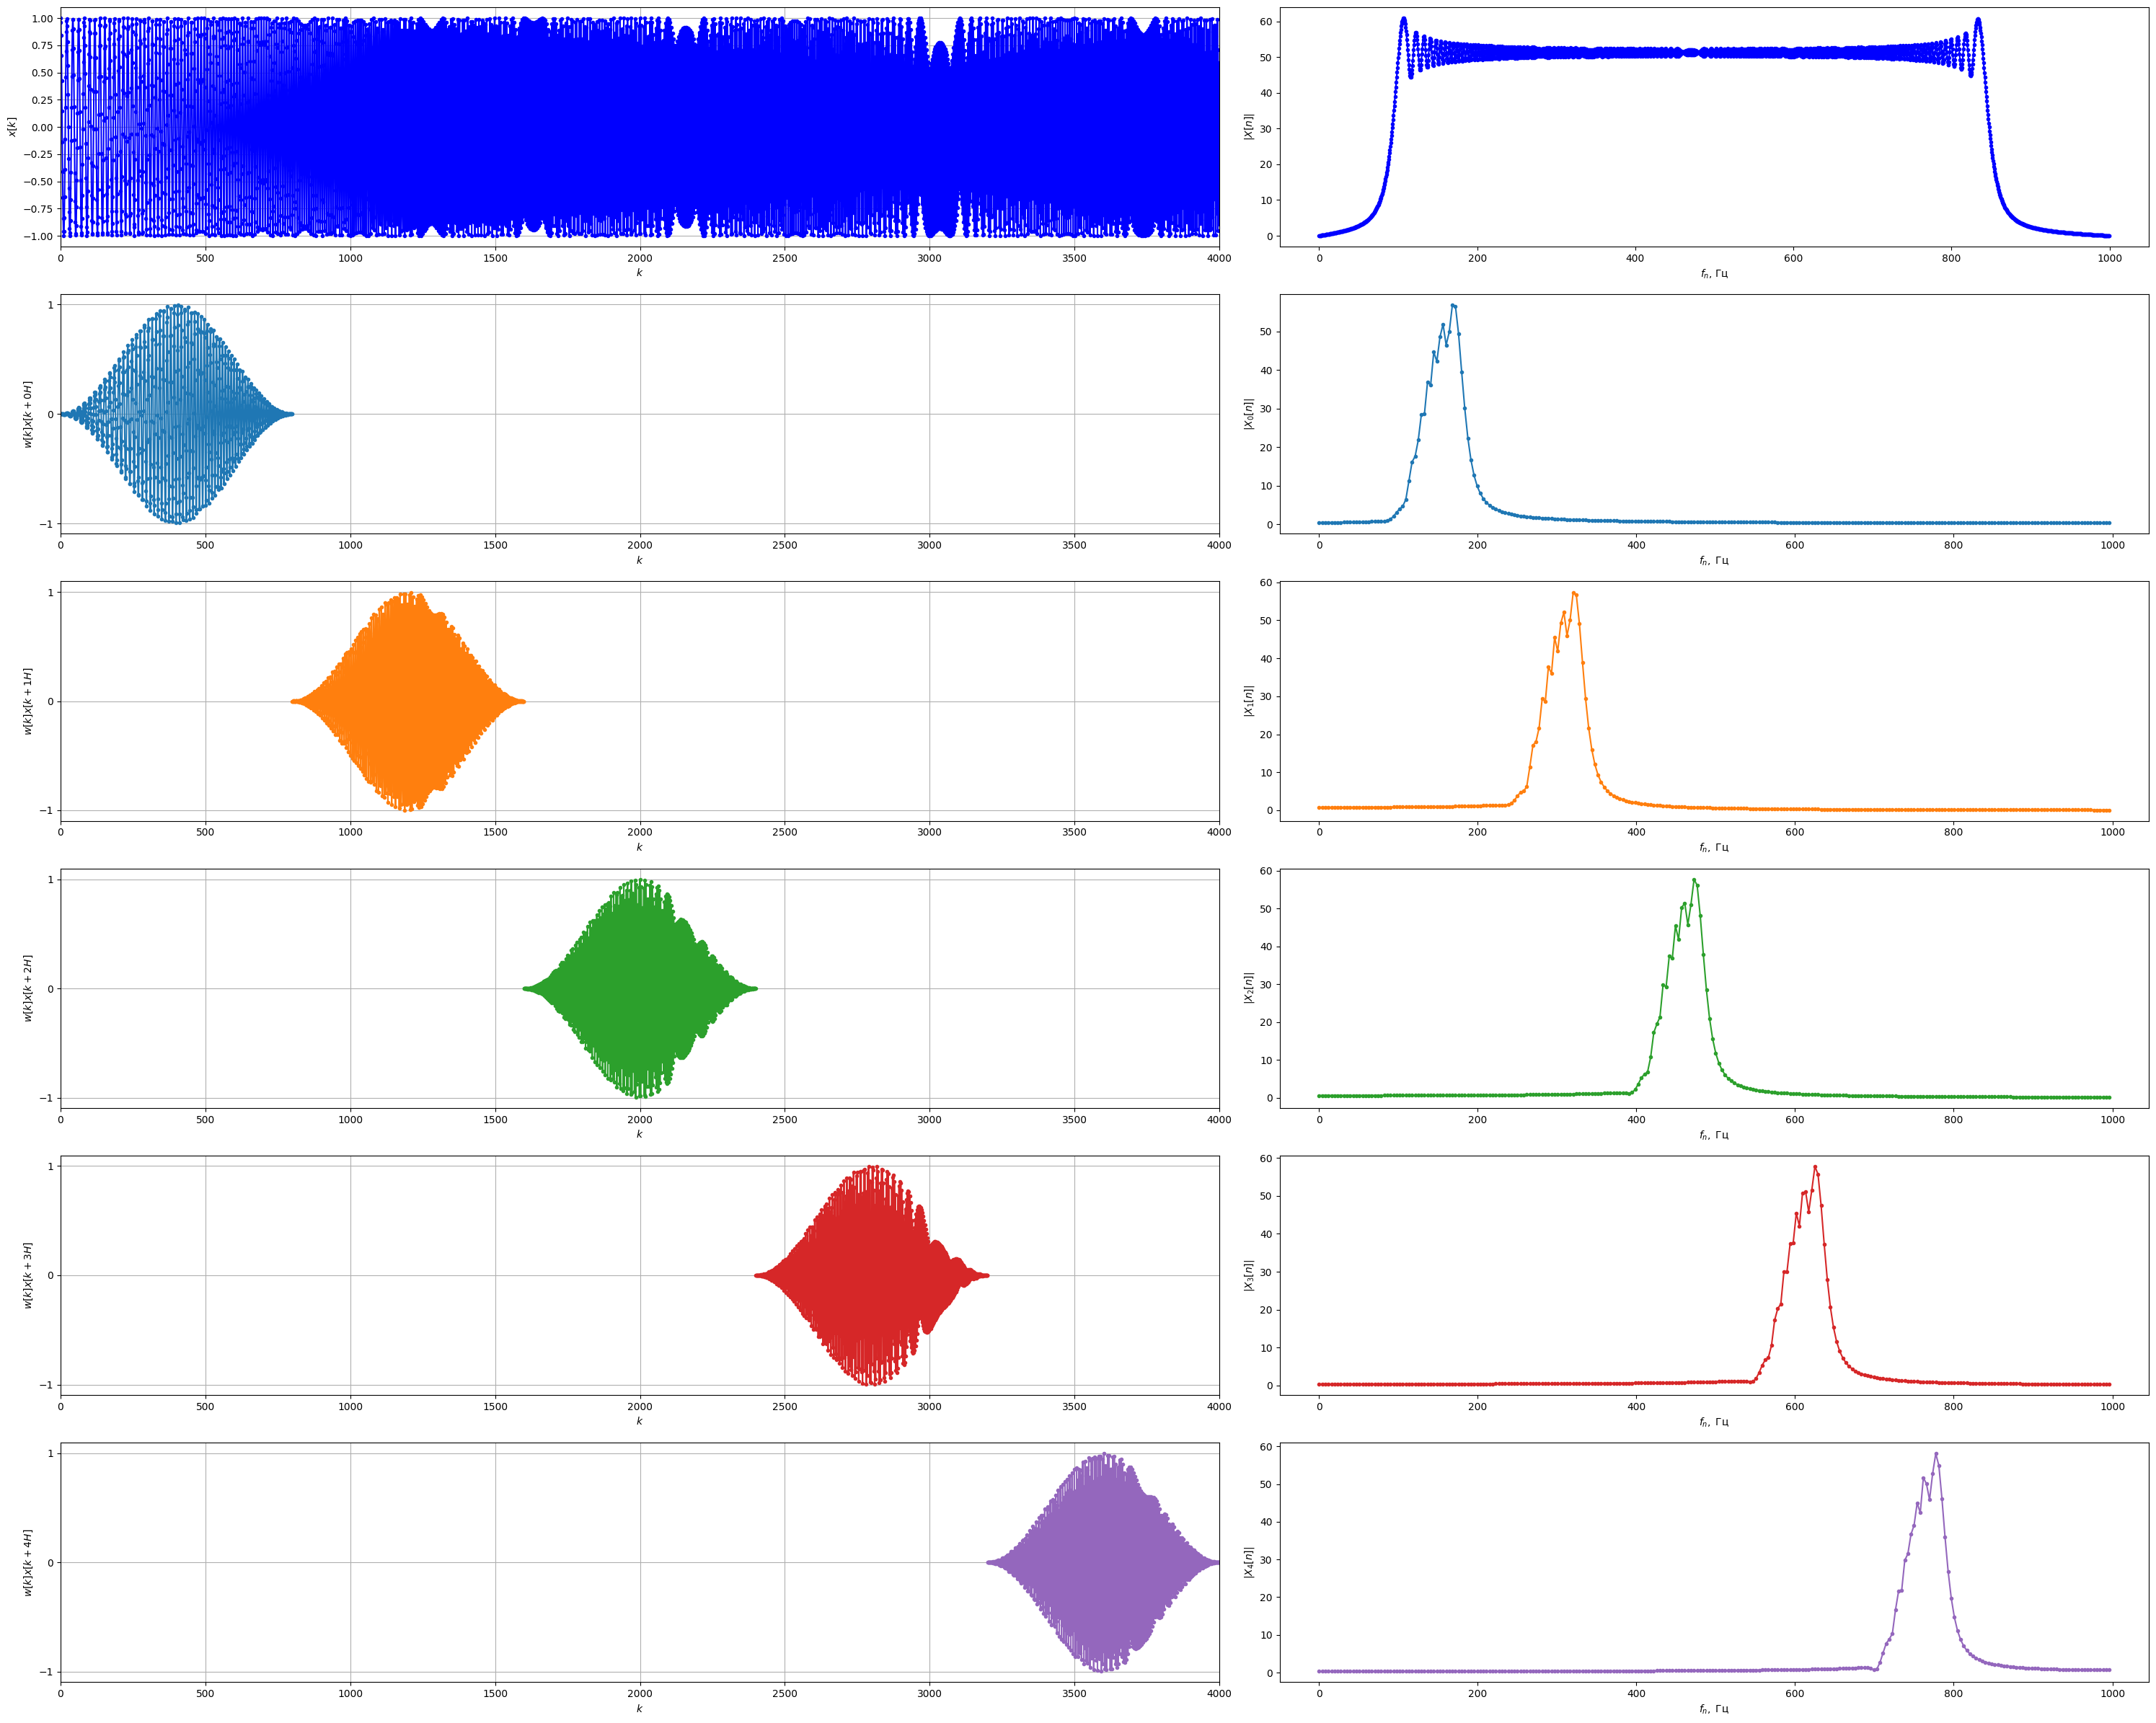

In [177]:
plot_chirp(scp.signal.windows.hann, nperseg=800)

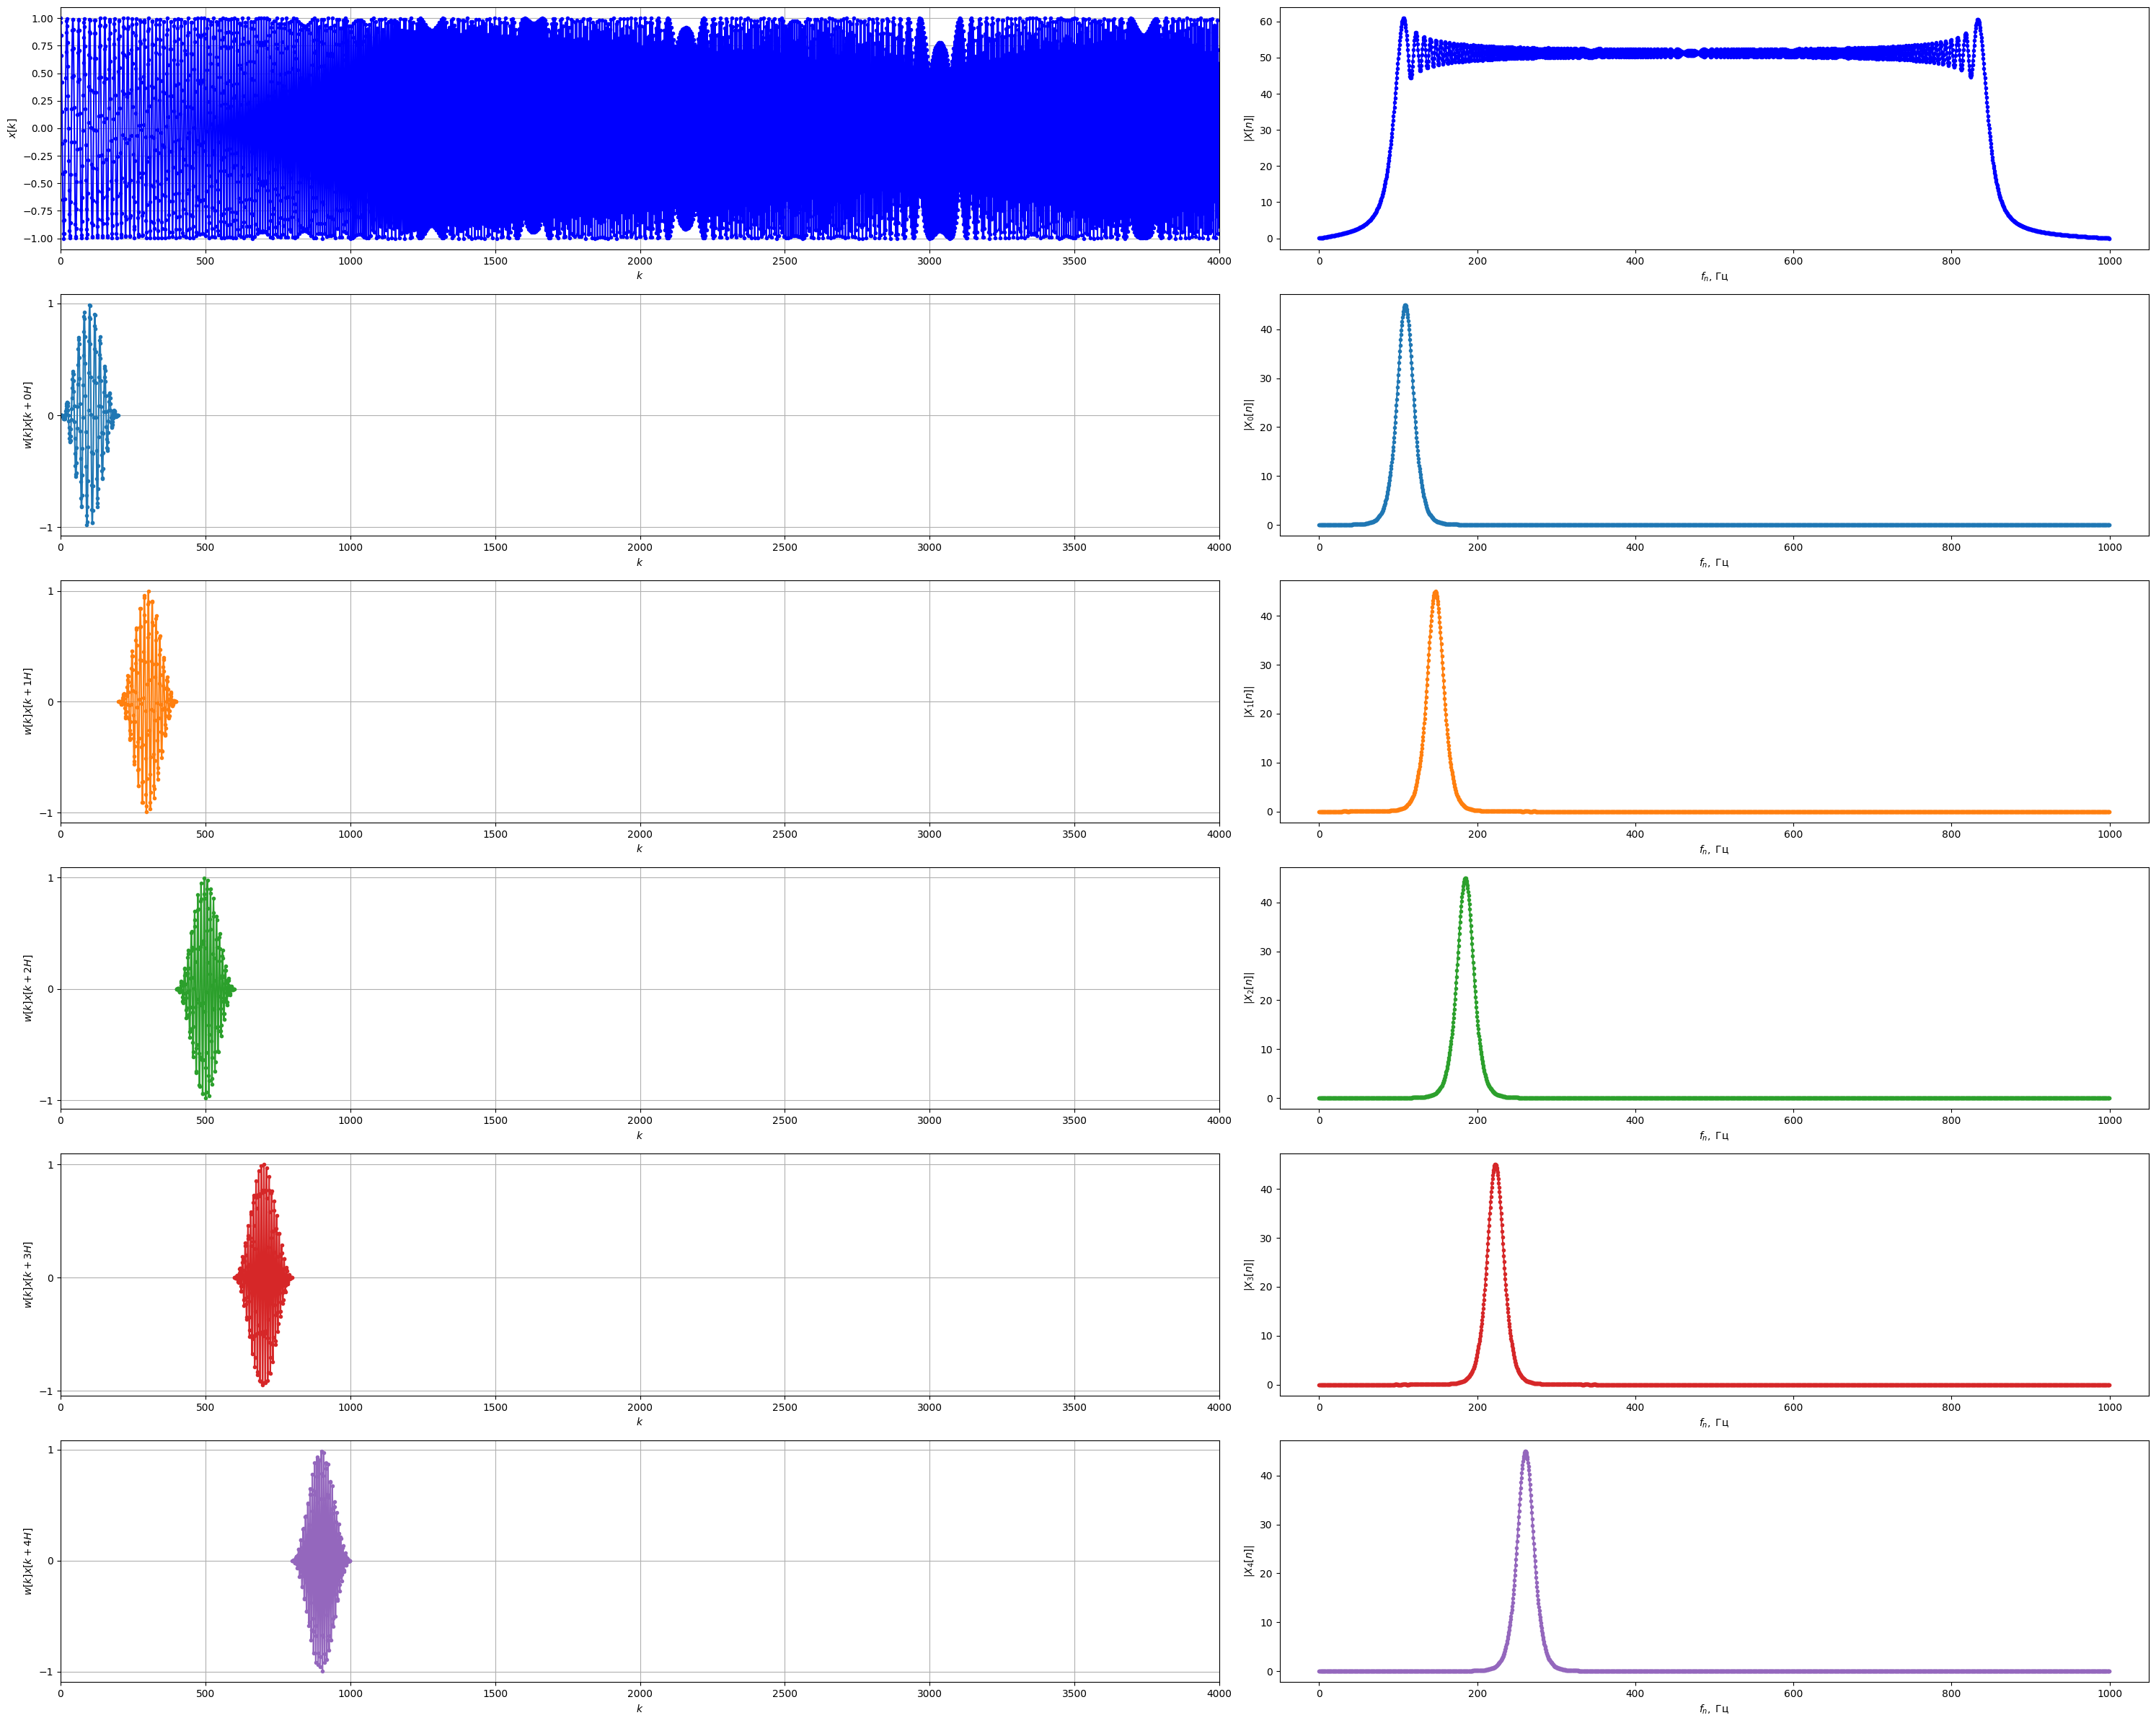

In [178]:
plot_chirp(scp.signal.windows.hann, m=4096)